In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [86]:
df = pd.read_csv('HousePrices.csv')
df.head()

Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  Property_Sale_Price  
0       0      2   2008        WD         Normal               208500  
1       0      5   2007        WD         Normal               181500  
2       0      9   2008        WD         Normal               223500  
3       0      2   2006        WD        Abnorml               140000  
4       0     12   2008        WD         Normal               250000  

[5 rows x 81 columns]

In [87]:
print(df.shape) # rows = 2073, cols = 81

(2073, 81)


In [88]:
d1 = df.copy()

### Data Cleaning

#### 1) Handle Null Values

In [89]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

#### Create a function to display feature wise count and perentage of null values

In [90]:
def count_per_null(data):   # data = df
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Feature':nv.index,'Count':nv.values,
                          'Percent':(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent',ascending=False)
    return nv_df

In [91]:
nv = count_per_null(df)
nv

Feature  Count    Percent
16        PoolQC   2065  99.614086
18   MiscFeature   1993  96.140859
1          Alley   1944  93.777135
17         Fence   1669  80.511336
2     MasVnrType   1247  60.154366
10   FireplaceQu    988  47.660396
0    LotFrontage    320  15.436565
11    GarageType    113   5.451037
12   GarageYrBlt    113   5.451037
13  GarageFinish    113   5.451037
14    GarageQual    113   5.451037
15    GarageCond    113   5.451037
6   BsmtExposure     61   2.942595
8   BsmtFinType2     60   2.894356
7   BsmtFinType1     59   2.846117
5       BsmtCond     59   2.846117
4       BsmtQual     59   2.846117
3     MasVnrArea     14   0.675350
9     Electrical      1   0.048239

#### Handling Null Values
<pre>
1) Remove rows containing null.
2) Remove columns containing null. 
3) Fill the null values
a) Continuous Feature - mean or median imputation
b) catgeorical feature - Mode or 'Other' or 'Unknown' 
3) Advanced Approaches

#### Drop features conatining high % of null values

In [92]:
cols_to_drop = ['PoolQC','MiscFeature','Alley']
for i in cols_to_drop:
    print('feature',i)
    print(df[i].value_counts())

feature PoolQC
PoolQC
Gd    4
Ex    2
Fa    2
Name: count, dtype: int64
feature MiscFeature
MiscFeature
Shed    74
Othr     3
Gar2     2
TenC     1
Name: count, dtype: int64
feature Alley
Alley
Grvl    72
Pave    57
Name: count, dtype: int64


In [93]:
df.drop(cols_to_drop,axis=1,inplace=True)

In [94]:
df.shape

(2073, 78)

In [95]:
nv = count_per_null(df)
nv

Feature  Count    Percent
15         Fence   1669  80.511336
1     MasVnrType   1247  60.154366
9    FireplaceQu    988  47.660396
0    LotFrontage    320  15.436565
10    GarageType    113   5.451037
11   GarageYrBlt    113   5.451037
12  GarageFinish    113   5.451037
13    GarageQual    113   5.451037
14    GarageCond    113   5.451037
5   BsmtExposure     61   2.942595
7   BsmtFinType2     60   2.894356
3       BsmtQual     59   2.846117
4       BsmtCond     59   2.846117
6   BsmtFinType1     59   2.846117
2     MasVnrArea     14   0.675350
8     Electrical      1   0.048239

#### Handling null values in Basement realted features

In [96]:
bsmt_feat = ['BsmtExposure','BsmtFinType2','BsmtQual','BsmtCond','BsmtFinType1']
for i in bsmt_feat:
    print('Feature',i)
    print(df[i].value_counts())

Feature BsmtExposure
BsmtExposure
No    1349
Av     322
Gd     181
Mn     160
Name: count, dtype: int64
Feature BsmtFinType2
BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: count, dtype: int64
Feature BsmtQual
BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: count, dtype: int64
Feature BsmtCond
BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: count, dtype: int64
Feature BsmtFinType1
BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: count, dtype: int64


In [97]:
for i in bsmt_feat:
    df[i] = df[i].fillna('No Basement')

In [98]:
nv = count_per_null(df)
nv

Feature  Count    Percent
10         Fence   1669  80.511336
1     MasVnrType   1247  60.154366
4    FireplaceQu    988  47.660396
0    LotFrontage    320  15.436565
5     GarageType    113   5.451037
6    GarageYrBlt    113   5.451037
7   GarageFinish    113   5.451037
8     GarageQual    113   5.451037
9     GarageCond    113   5.451037
2     MasVnrArea     14   0.675350
3     Electrical      1   0.048239

#### Handling Null values in Garage based features

In [99]:
garage_feat =  ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for i in garage_feat:
    print('Feature',i)
    print(df[i].value_counts())

Feature GarageType
GarageType
Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: count, dtype: int64
Feature GarageYrBlt
GarageYrBlt
2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: count, Length: 102, dtype: int64
Feature GarageFinish
GarageFinish
Unf    857
RFn    605
Fin    498
Name: count, dtype: int64
Feature GarageQual
GarageQual
TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: count, dtype: int64
Feature GarageCond
GarageCond
TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: count, dtype: int64


In [100]:
for i in garage_feat:
    if i != 'GarageYrBlt':
        df[i] = df[i].fillna('No Garage')

In [101]:
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: count, Length: 102, dtype: int64

In [102]:
nv = count_per_null(df)
nv

Feature  Count    Percent
6        Fence   1669  80.511336
1   MasVnrType   1247  60.154366
4  FireplaceQu    988  47.660396
0  LotFrontage    320  15.436565
5  GarageYrBlt    113   5.451037
2   MasVnrArea     14   0.675350
3   Electrical      1   0.048239

In [103]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: count, dtype: int64

In [104]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')

In [105]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    620
Stone      186
BrkCmn      20
Name: count, dtype: int64

In [106]:
df['MasVnrType']  = df['MasVnrType'].fillna('No Masonry') 

In [107]:
for i in ['LotFrontage','MasVnrArea']:
    print('Feature',i)
    print(df[i].value_counts())

Feature LotFrontage
LotFrontage
60.0     181
70.0      91
80.0      89
75.0      73
50.0      72
        ... 
111.0      1
141.0      1
140.0      1
150.0      1
46.0       1
Name: count, Length: 110, dtype: int64
Feature MasVnrArea
MasVnrArea
0.0      1229
108.0      12
340.0      10
106.0       9
210.0       9
         ... 
594.0       1
219.0       1
479.0       1
584.0       1
74.0        1
Name: count, Length: 342, dtype: int64


In [108]:
print(df['LotFrontage'].mean())
print(df['LotFrontage'].median())
print(df['MasVnrArea'].mode()[0])

72.05647461494581
70.0
0.0


In [109]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [110]:
# sns.boxplot(df['LotFrontage'])
# plt.show()

In [111]:
nv = count_per_null(df)
nv

Feature  Count    Percent
2        Fence   1669  80.511336
1  GarageYrBlt    113   5.451037
0   Electrical      1   0.048239

In [112]:
df['Fence'].value_counts()

Fence
MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: count, dtype: int64

In [113]:
df['Fence'].fillna('No Fence',inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8516\837384099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fence'].fillna('No Fence',inplace=True)


In [114]:
nv = count_per_null(df)
nv

Feature  Count   Percent
1  GarageYrBlt    113  5.451037
0   Electrical      1  0.048239

In [115]:
print(df['GarageYrBlt'].mode()[0])
print(df['GarageYrBlt'].mean())
print(df['GarageYrBlt'].median())

2005.0
1980.4183673469388
1984.0


In [116]:
df['GarageYrBlt'].describe()

count    1960.000000
mean     1980.418367
std        24.158327
min      1906.000000
25%      1963.000000
50%      1984.000000
75%      2003.000000
max      2019.000000
Name: GarageYrBlt, dtype: float64

<Axes: ylabel='GarageYrBlt'>

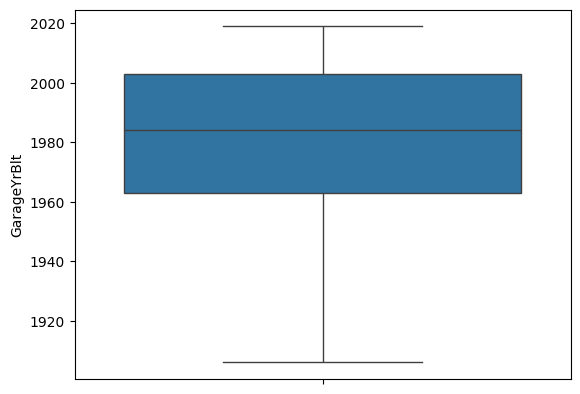

In [117]:
sns.boxplot(df['GarageYrBlt'])

In [118]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [119]:
nv = count_per_null(df)
nv

Feature  Count   Percent
0  Electrical      1  0.048239

In [120]:
df.dropna(inplace=True)

In [121]:
nv = count_per_null(df)
nv

Empty DataFrame
Columns: [Feature, Count, Percent]
Index: []

#### Handling Duplicates

In [122]:
df.duplicated().sum()

13

In [123]:
df.drop_duplicates(inplace=True)

In [124]:
df.shape

(2059, 78)

#### Separate Continuous and Categorical features

In [125]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAb

In [126]:
print(len(cat_cols))  # 14-14-12

40


In [127]:
#### Feature with all majority different values or majority same values are usually not considered as
#### independent feature. Thewse feat can be excluded from modelling.


#### EDA

#### Univariate - Catgeorical feat

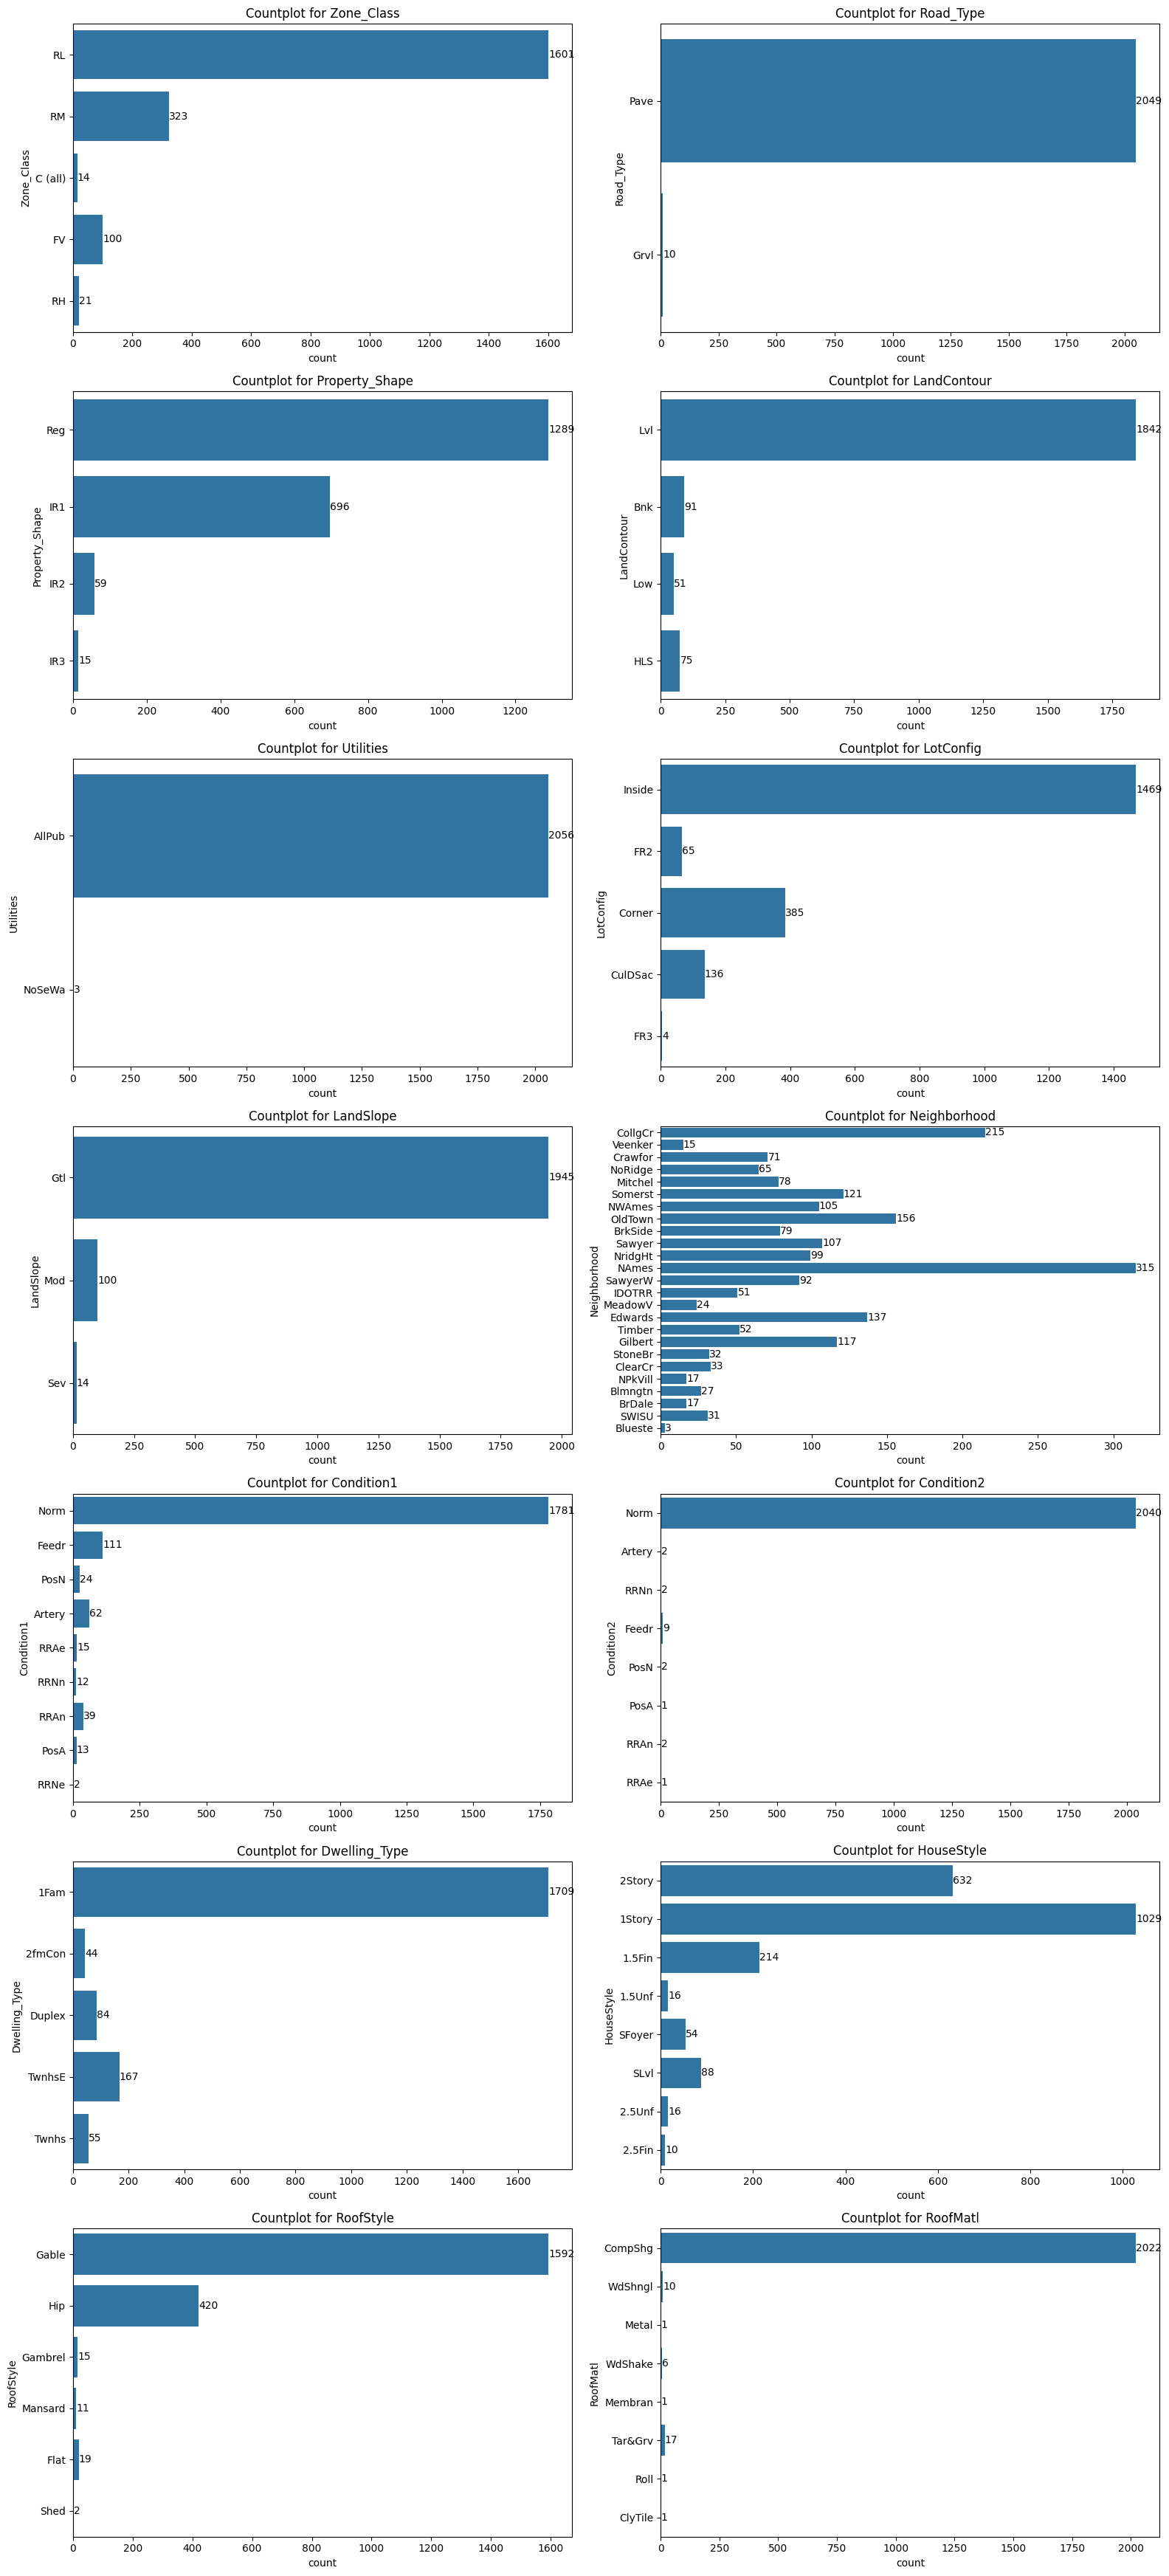

In [128]:
cols = ['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)  # rows = 7,cols=2
    ax = sns.countplot(df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inference
1) Road_Type, Condition2, Utilities, RoofMatl - can be dropped

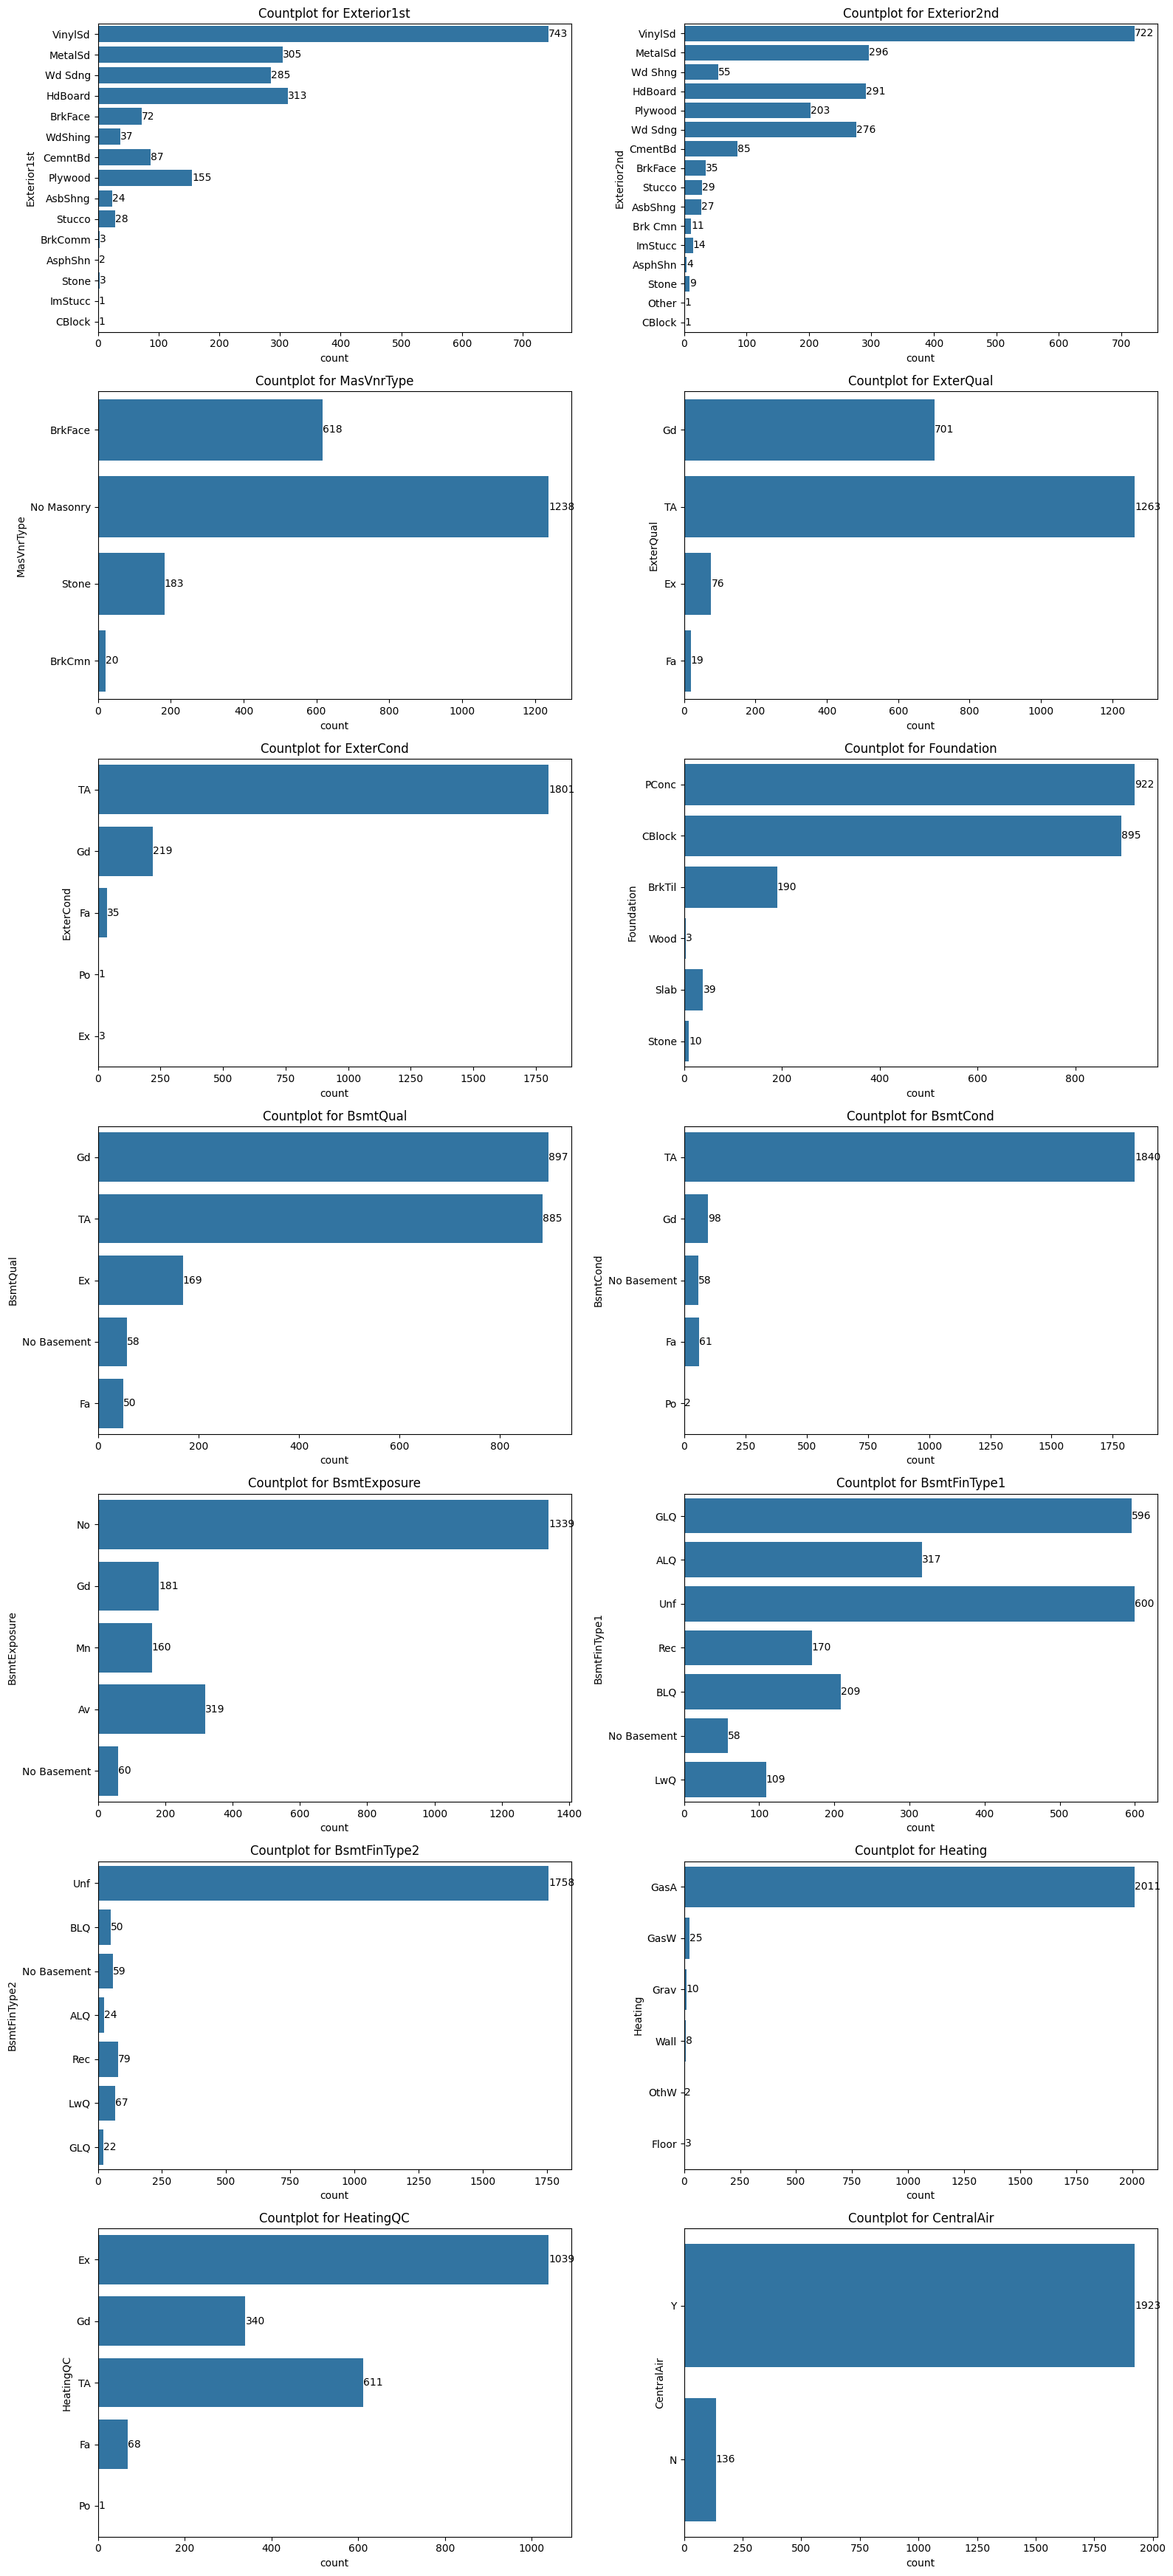

In [129]:
cols = ['Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)     # rows = 7,cols=2
    ax = sns.countplot(df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

Inference
1) Heating can be dropped.

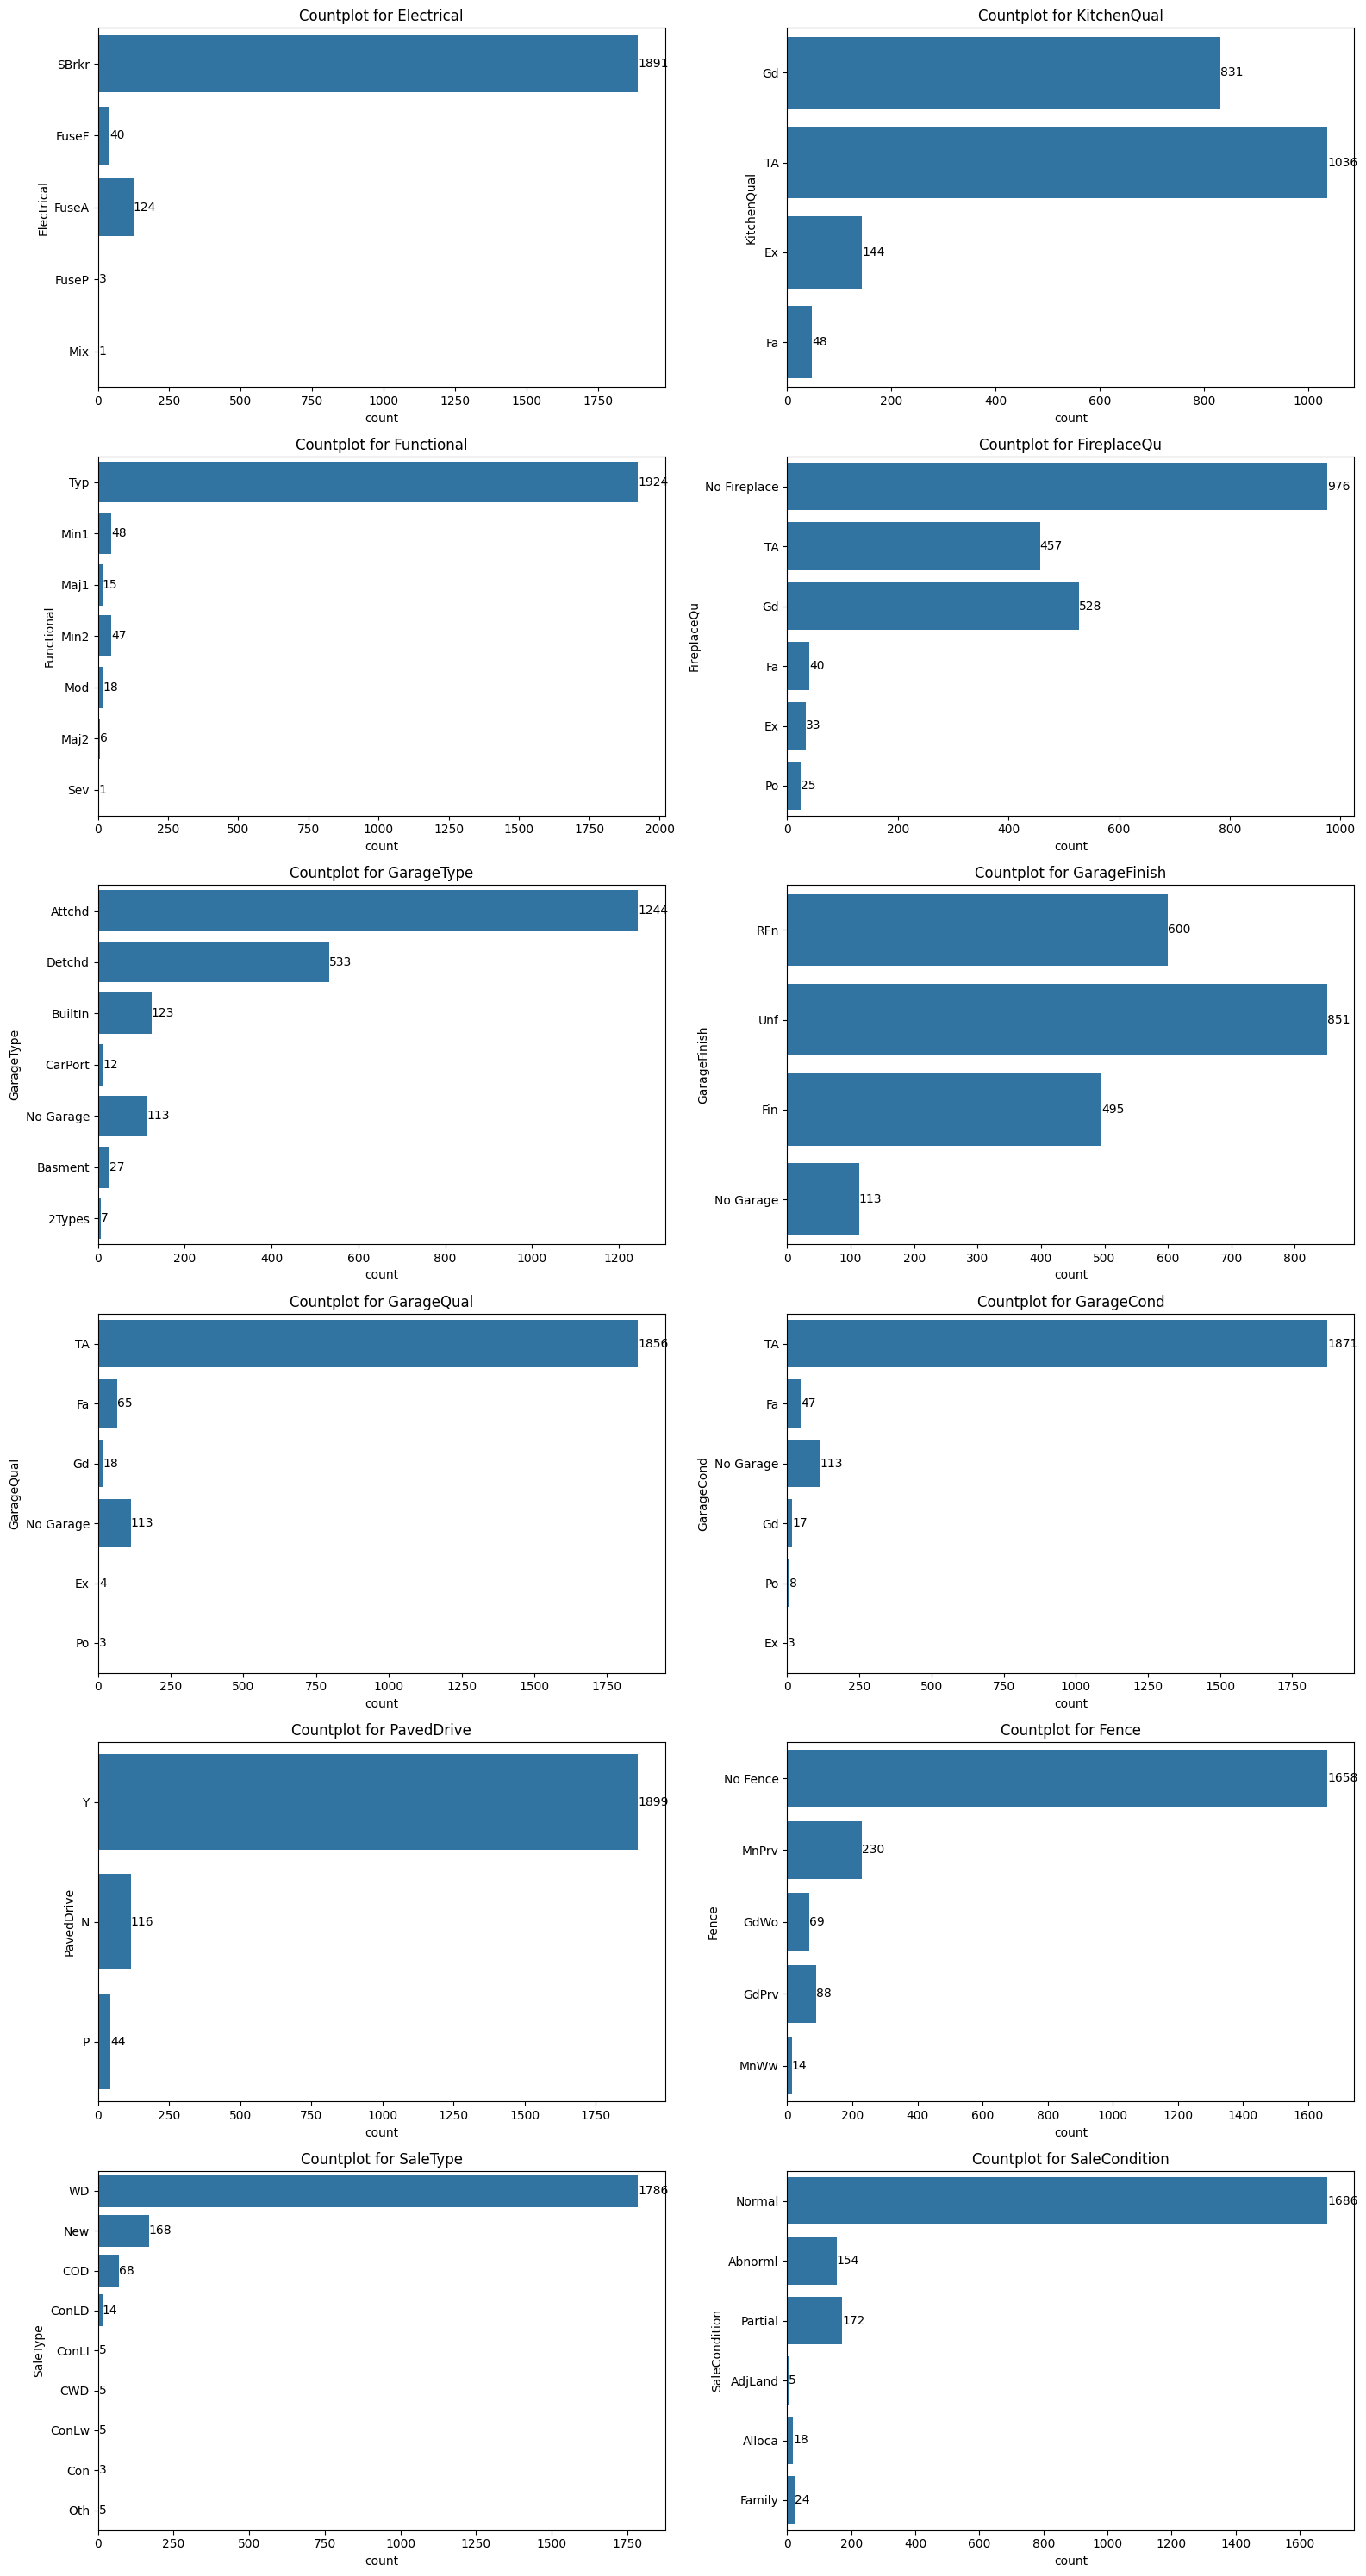

In [130]:
cols = ['Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

plt.figure(figsize=(16,30))   # height = 12, width = 30
for i in range(len(cols)):
    plt.subplot(6,2,i+1)      # rows = 6,cols=2
    ax = sns.countplot(df[cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inference
Functional can be dropped

#### Bivariate - Cat - Num

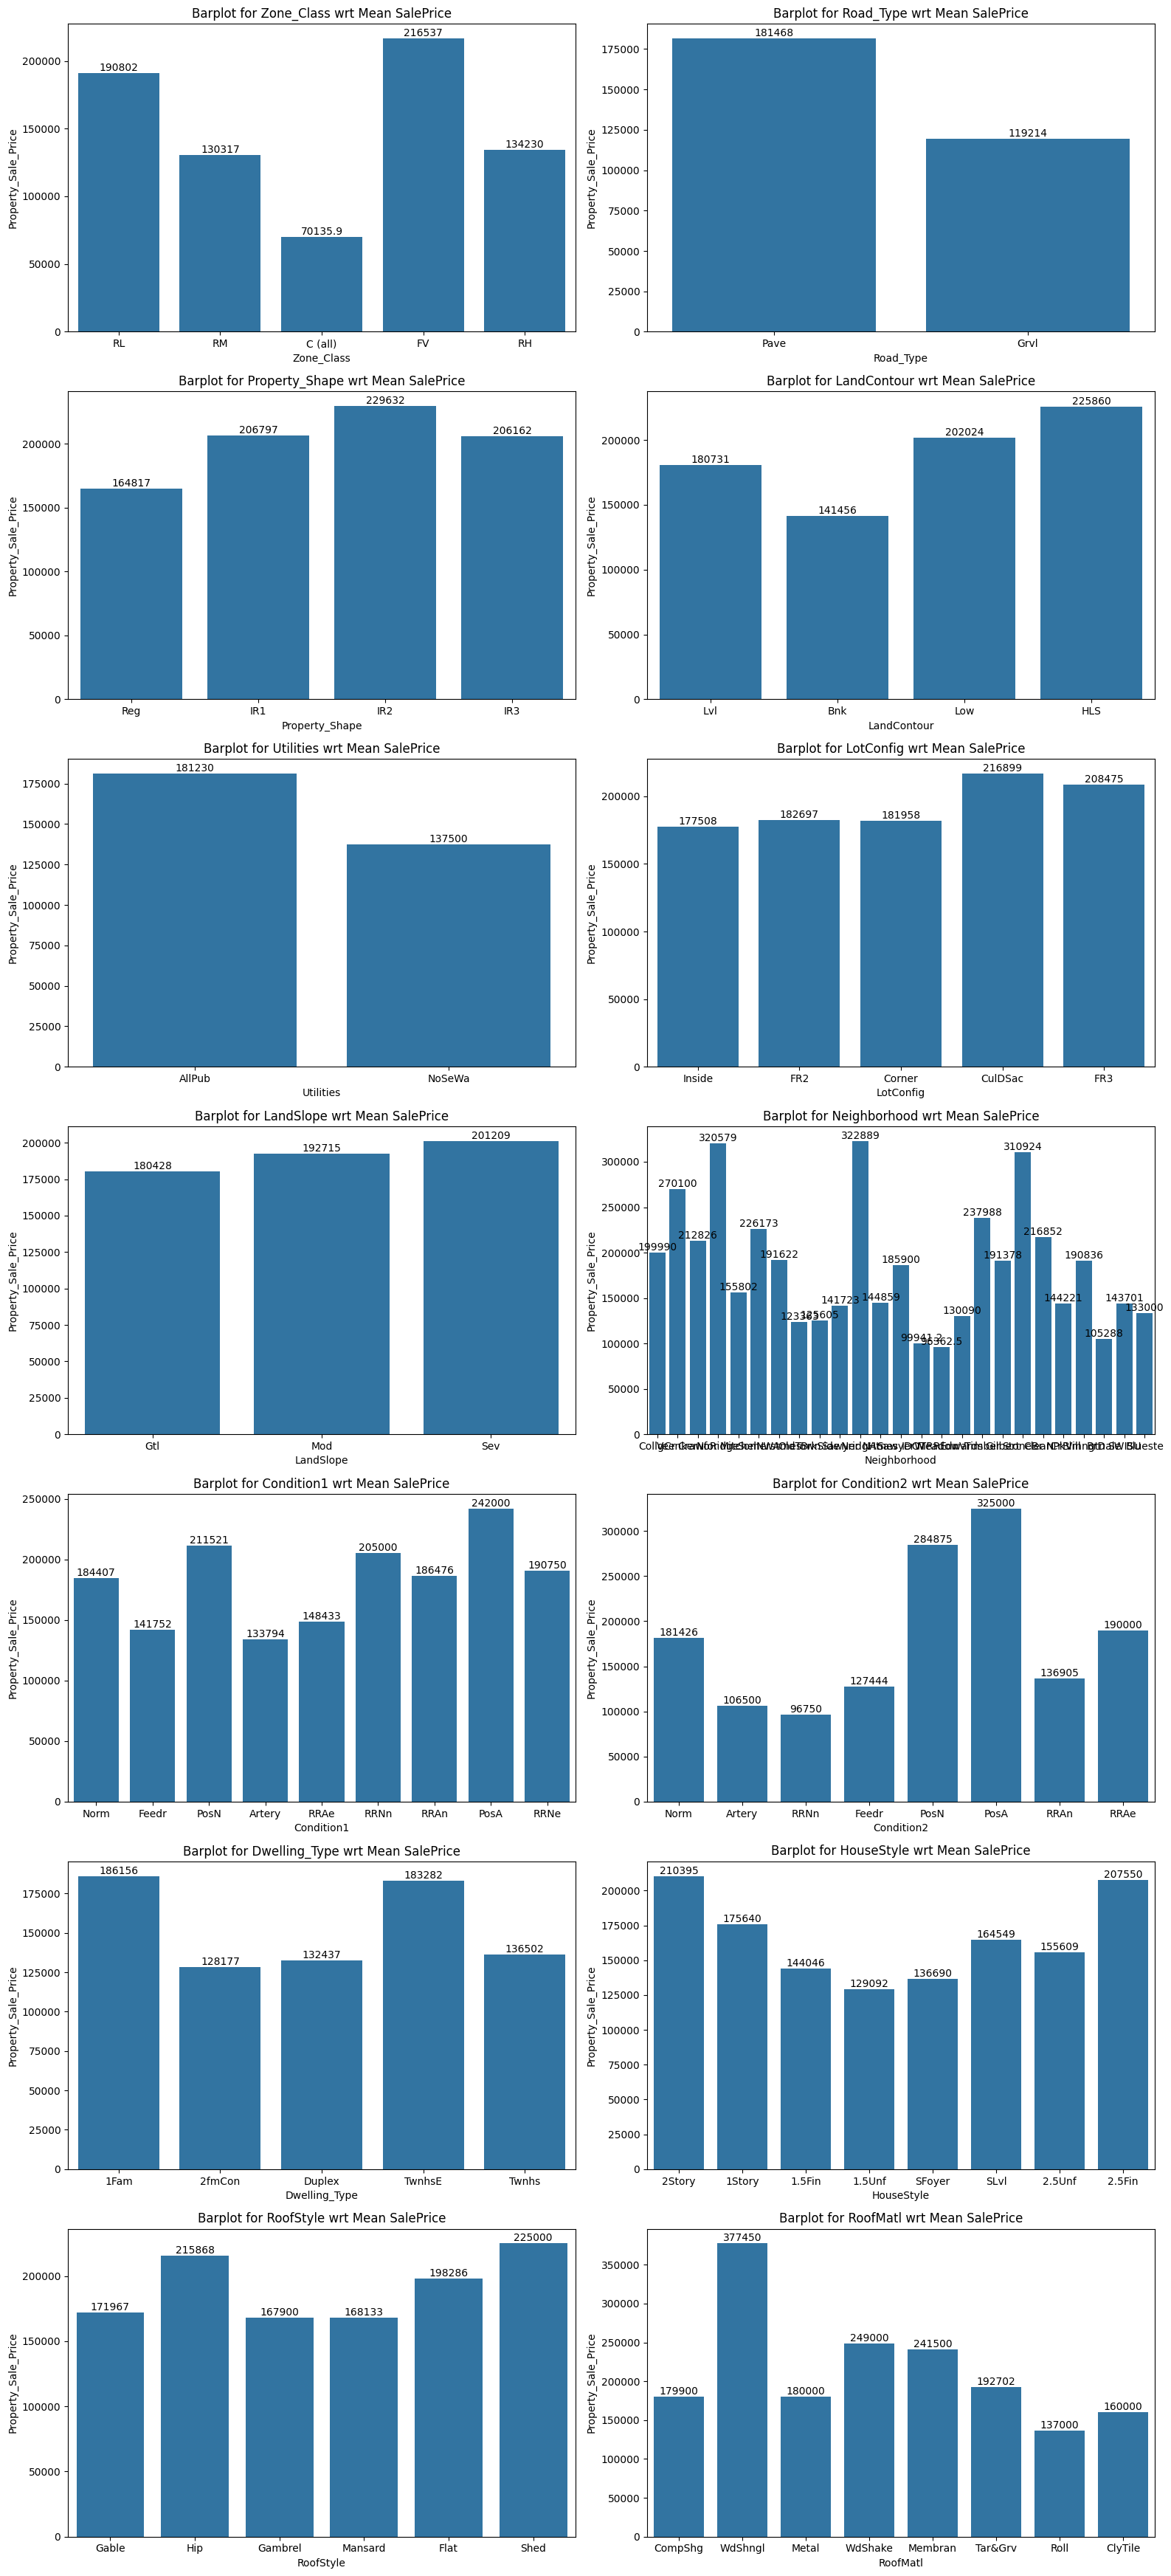

In [131]:
cols = ['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)  # rows = 7,cols=2
    ax = sns.barplot(x=df[cols[i]],y=df['Property_Sale_Price'],errorbar=('ci',0))
    ax.bar_label(ax.containers[0])
    plt.title(f'Barplot for {cols[i]} wrt Mean SalePrice')

plt.tight_layout()
plt.show()

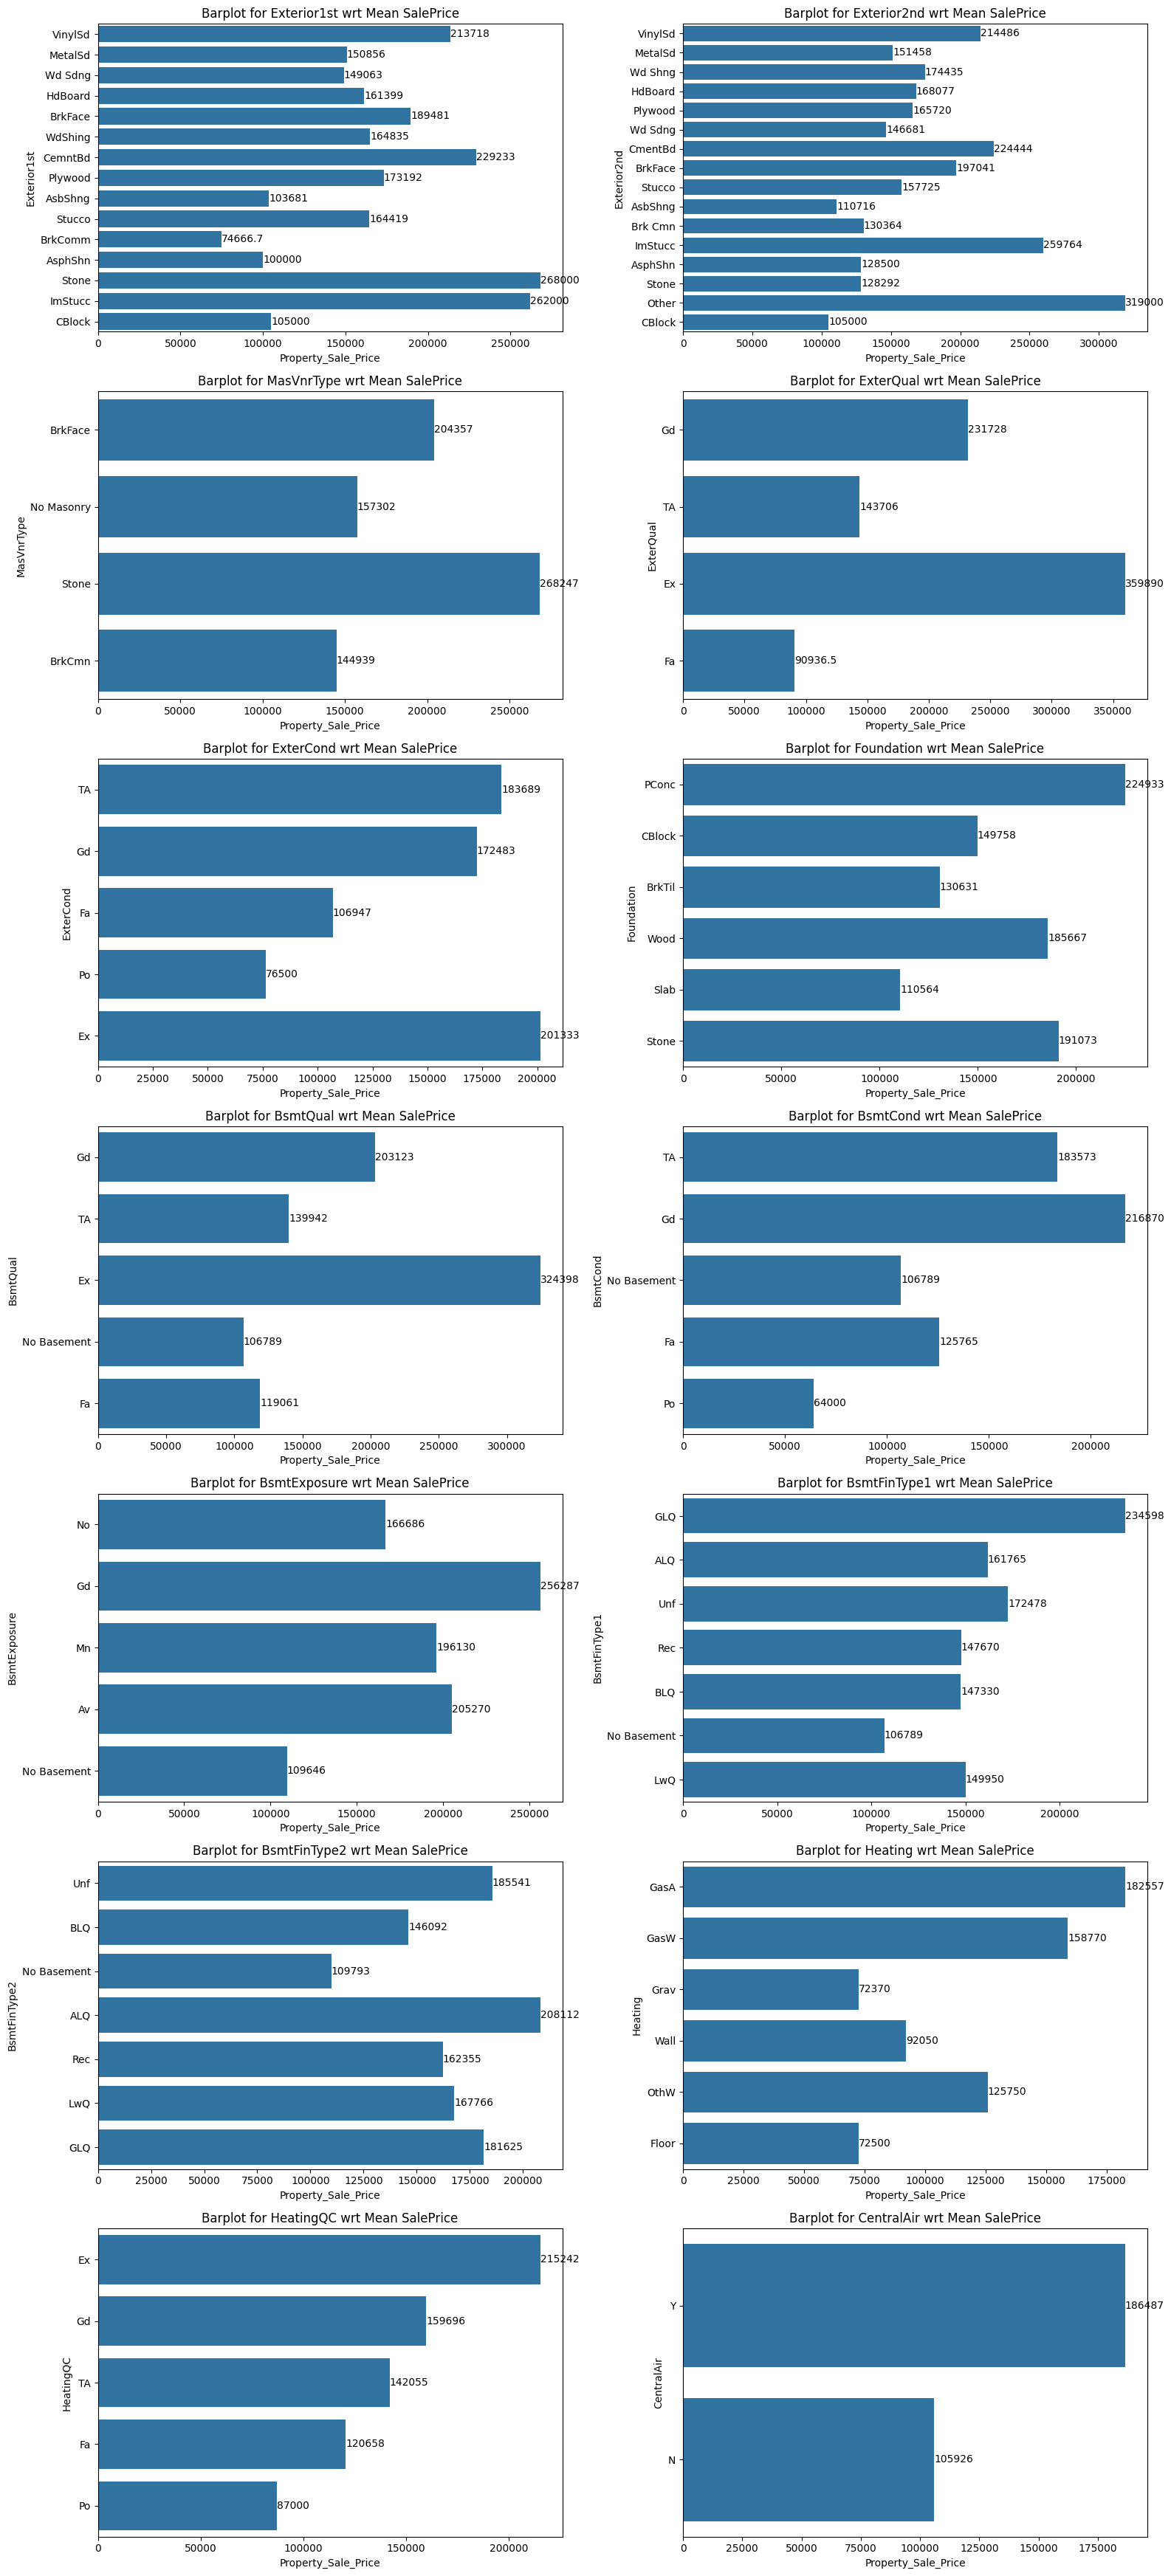

In [132]:
cols = ['Exterior1st','Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)  # rows = 7,cols=2
    ax = sns.barplot(y=df[cols[i]],x=df['Property_Sale_Price'],errorbar=('ci',0))
    ax.bar_label(ax.containers[0])
    plt.title(f'Barplot for {cols[i]} wrt Mean SalePrice')

plt.tight_layout()
plt.show()

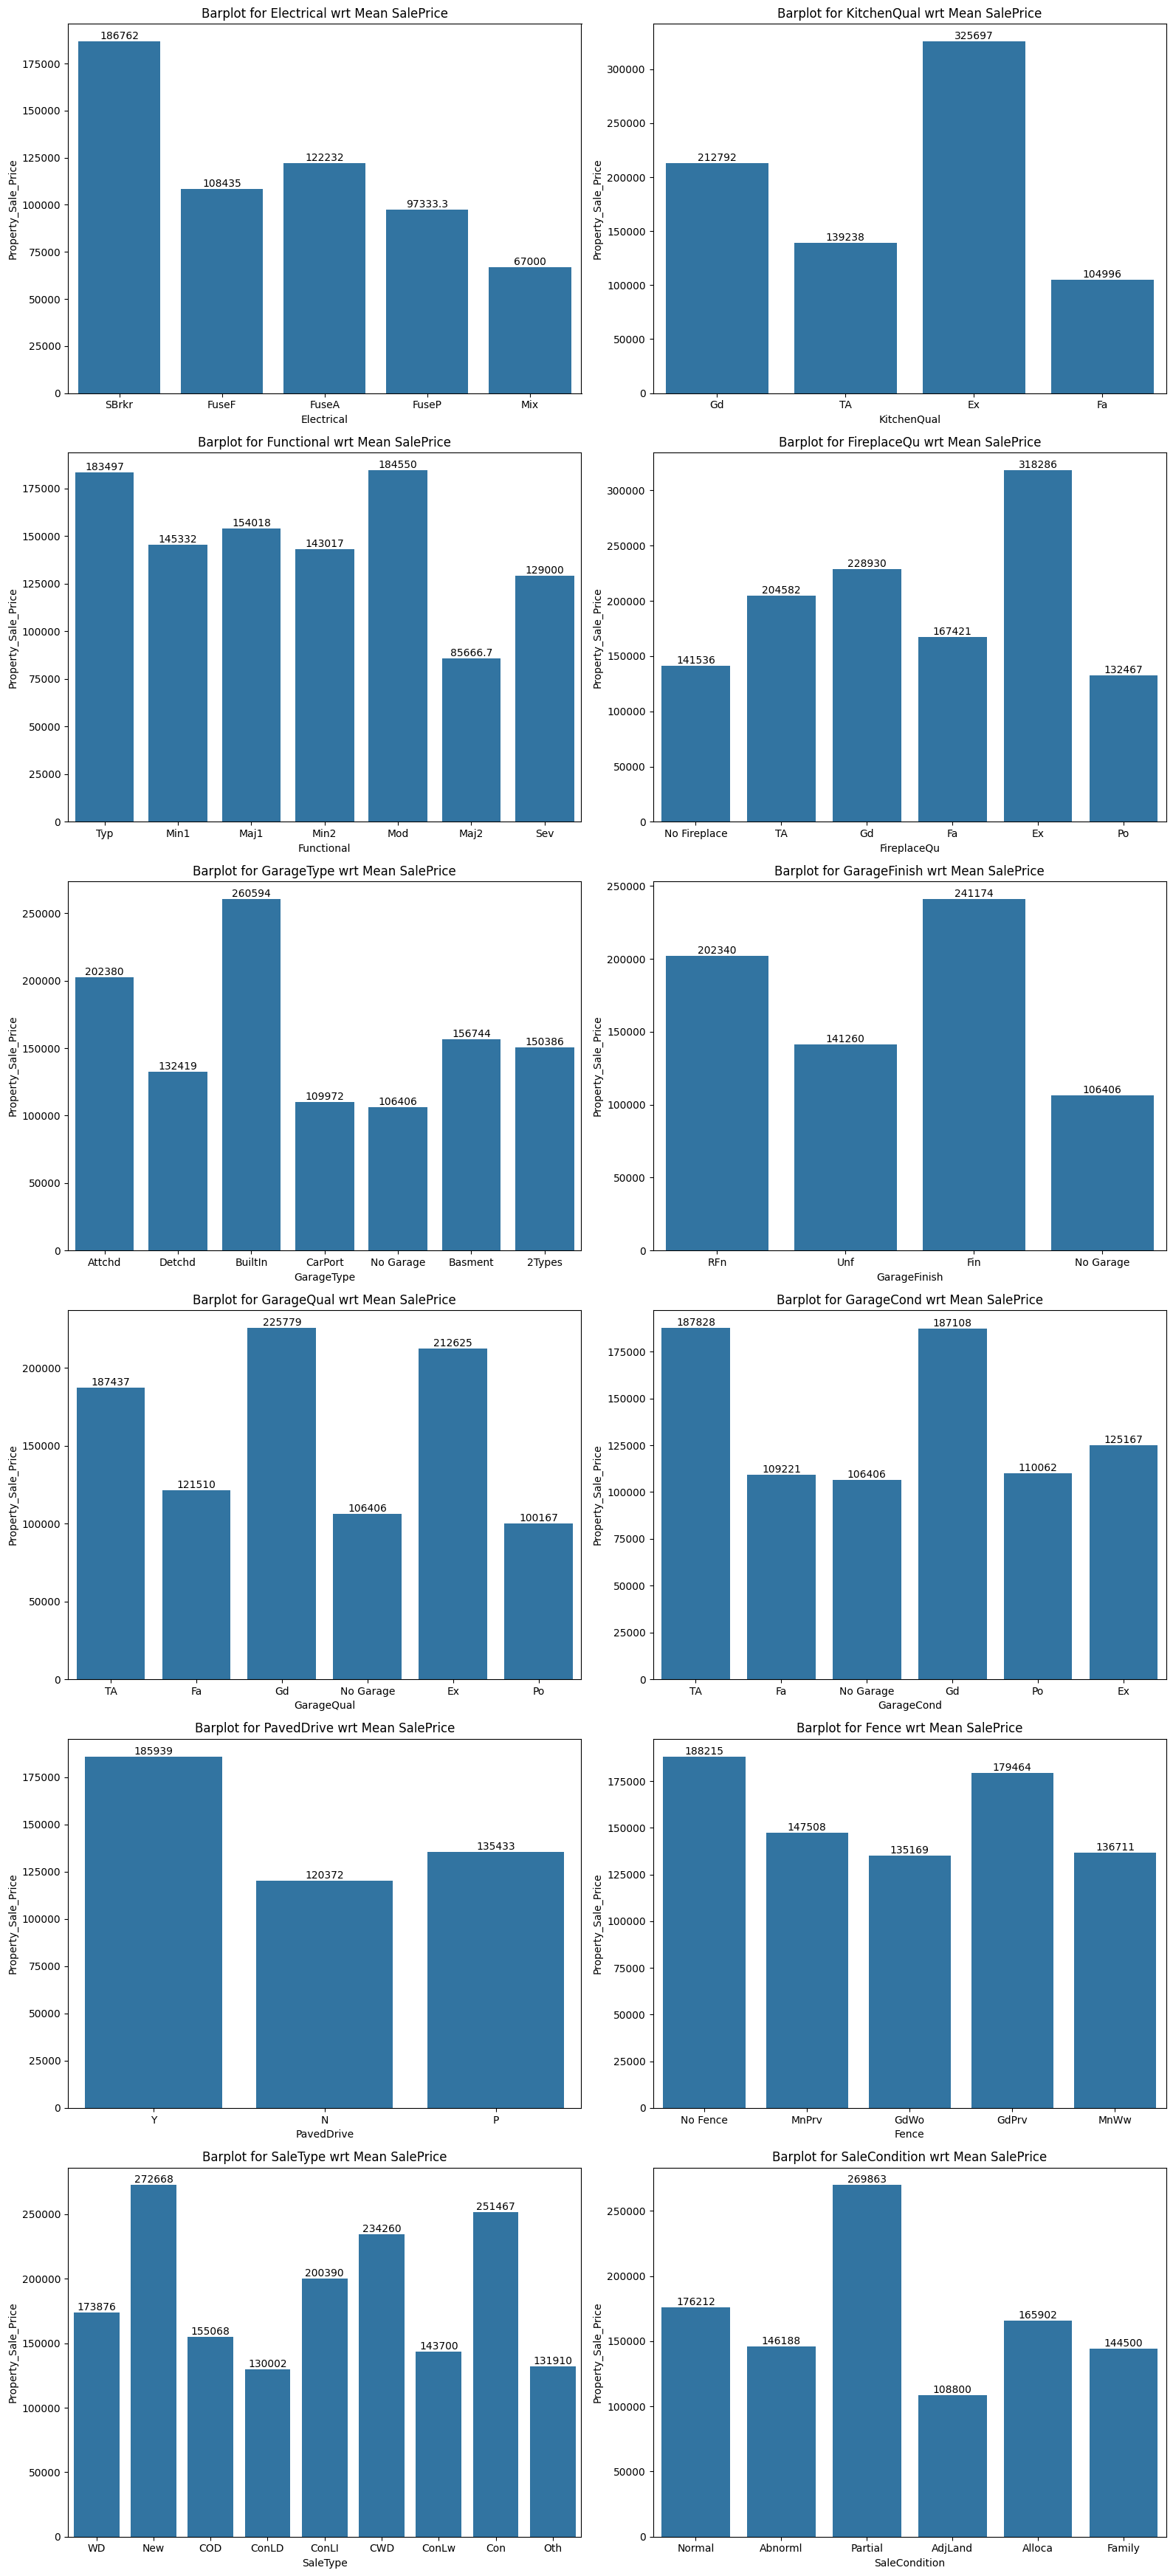

In [133]:
cols = ['Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(6,2,i+1)  # rows = 6,cols=2
    ax = sns.barplot(x=df[cols[i]],y=df['Property_Sale_Price'],errorbar=('ci',0))
    ax.bar_label(ax.containers[0])
    plt.title(f'Barplot for {cols[i]} wrt Mean SalePrice')

plt.tight_layout()
plt.show()

#### Univariate - Numerical

In [134]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

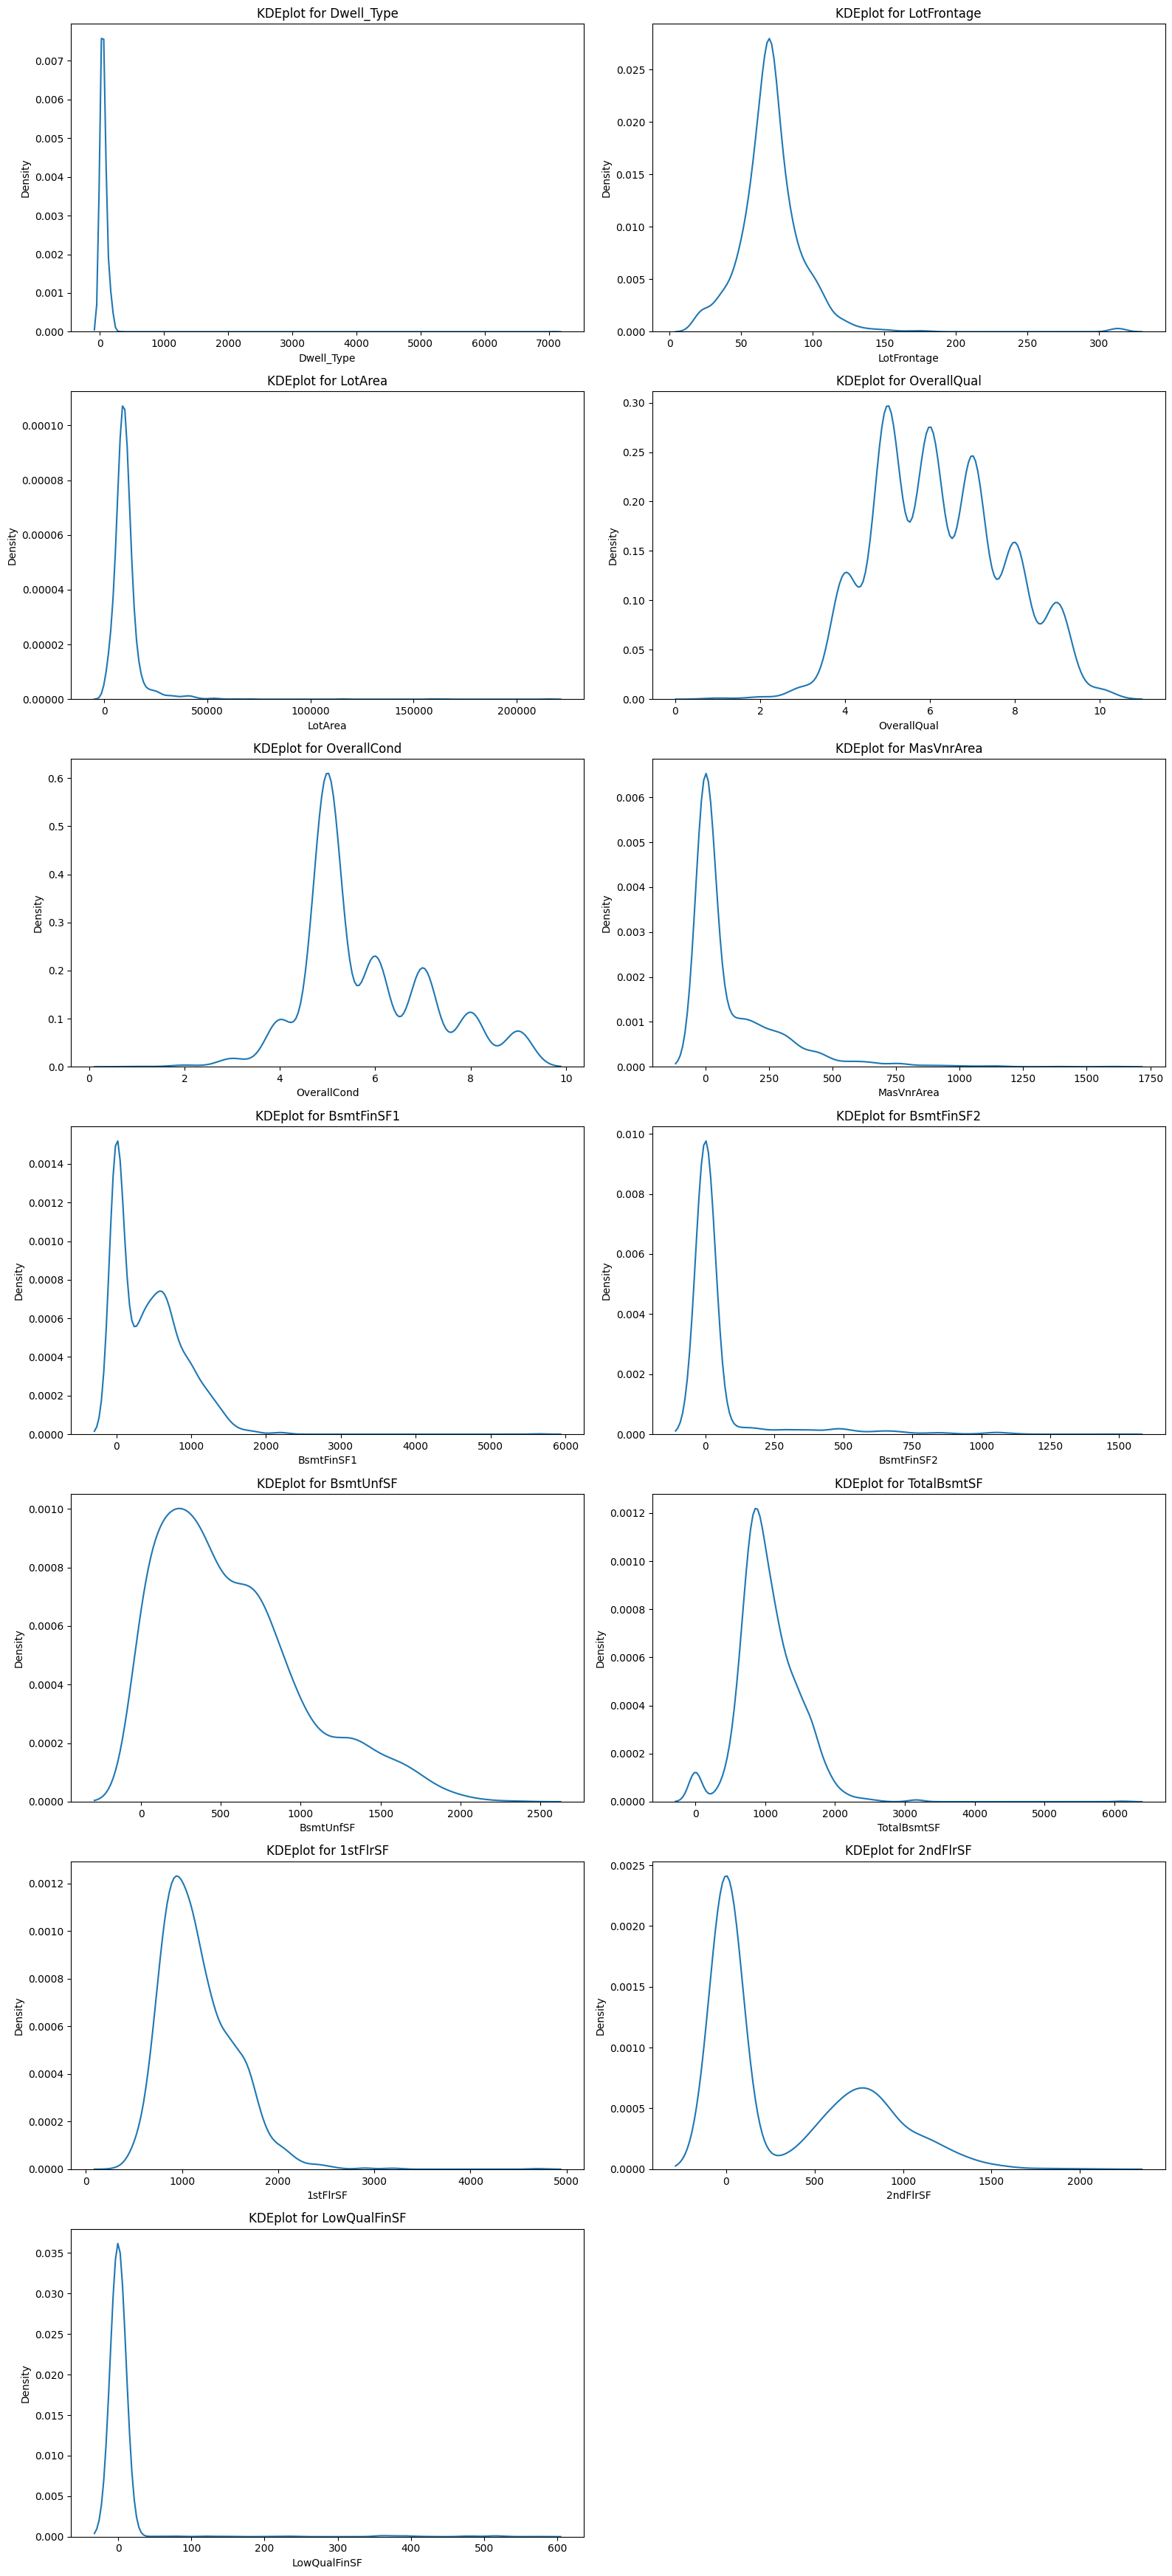

In [135]:
cols = ['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF']

plt.figure(figsize=(16,35))  # height = 12, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)  # rows = 6,cols=2
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Inference
1) Dwell_type, LotArea, AasVnrArea, LowQualFinSF, 1stFlrSF, 2ndFlrSF, TotalBsmtSF, BSmtUnfSF etc 
are Right(Postively) skewed.

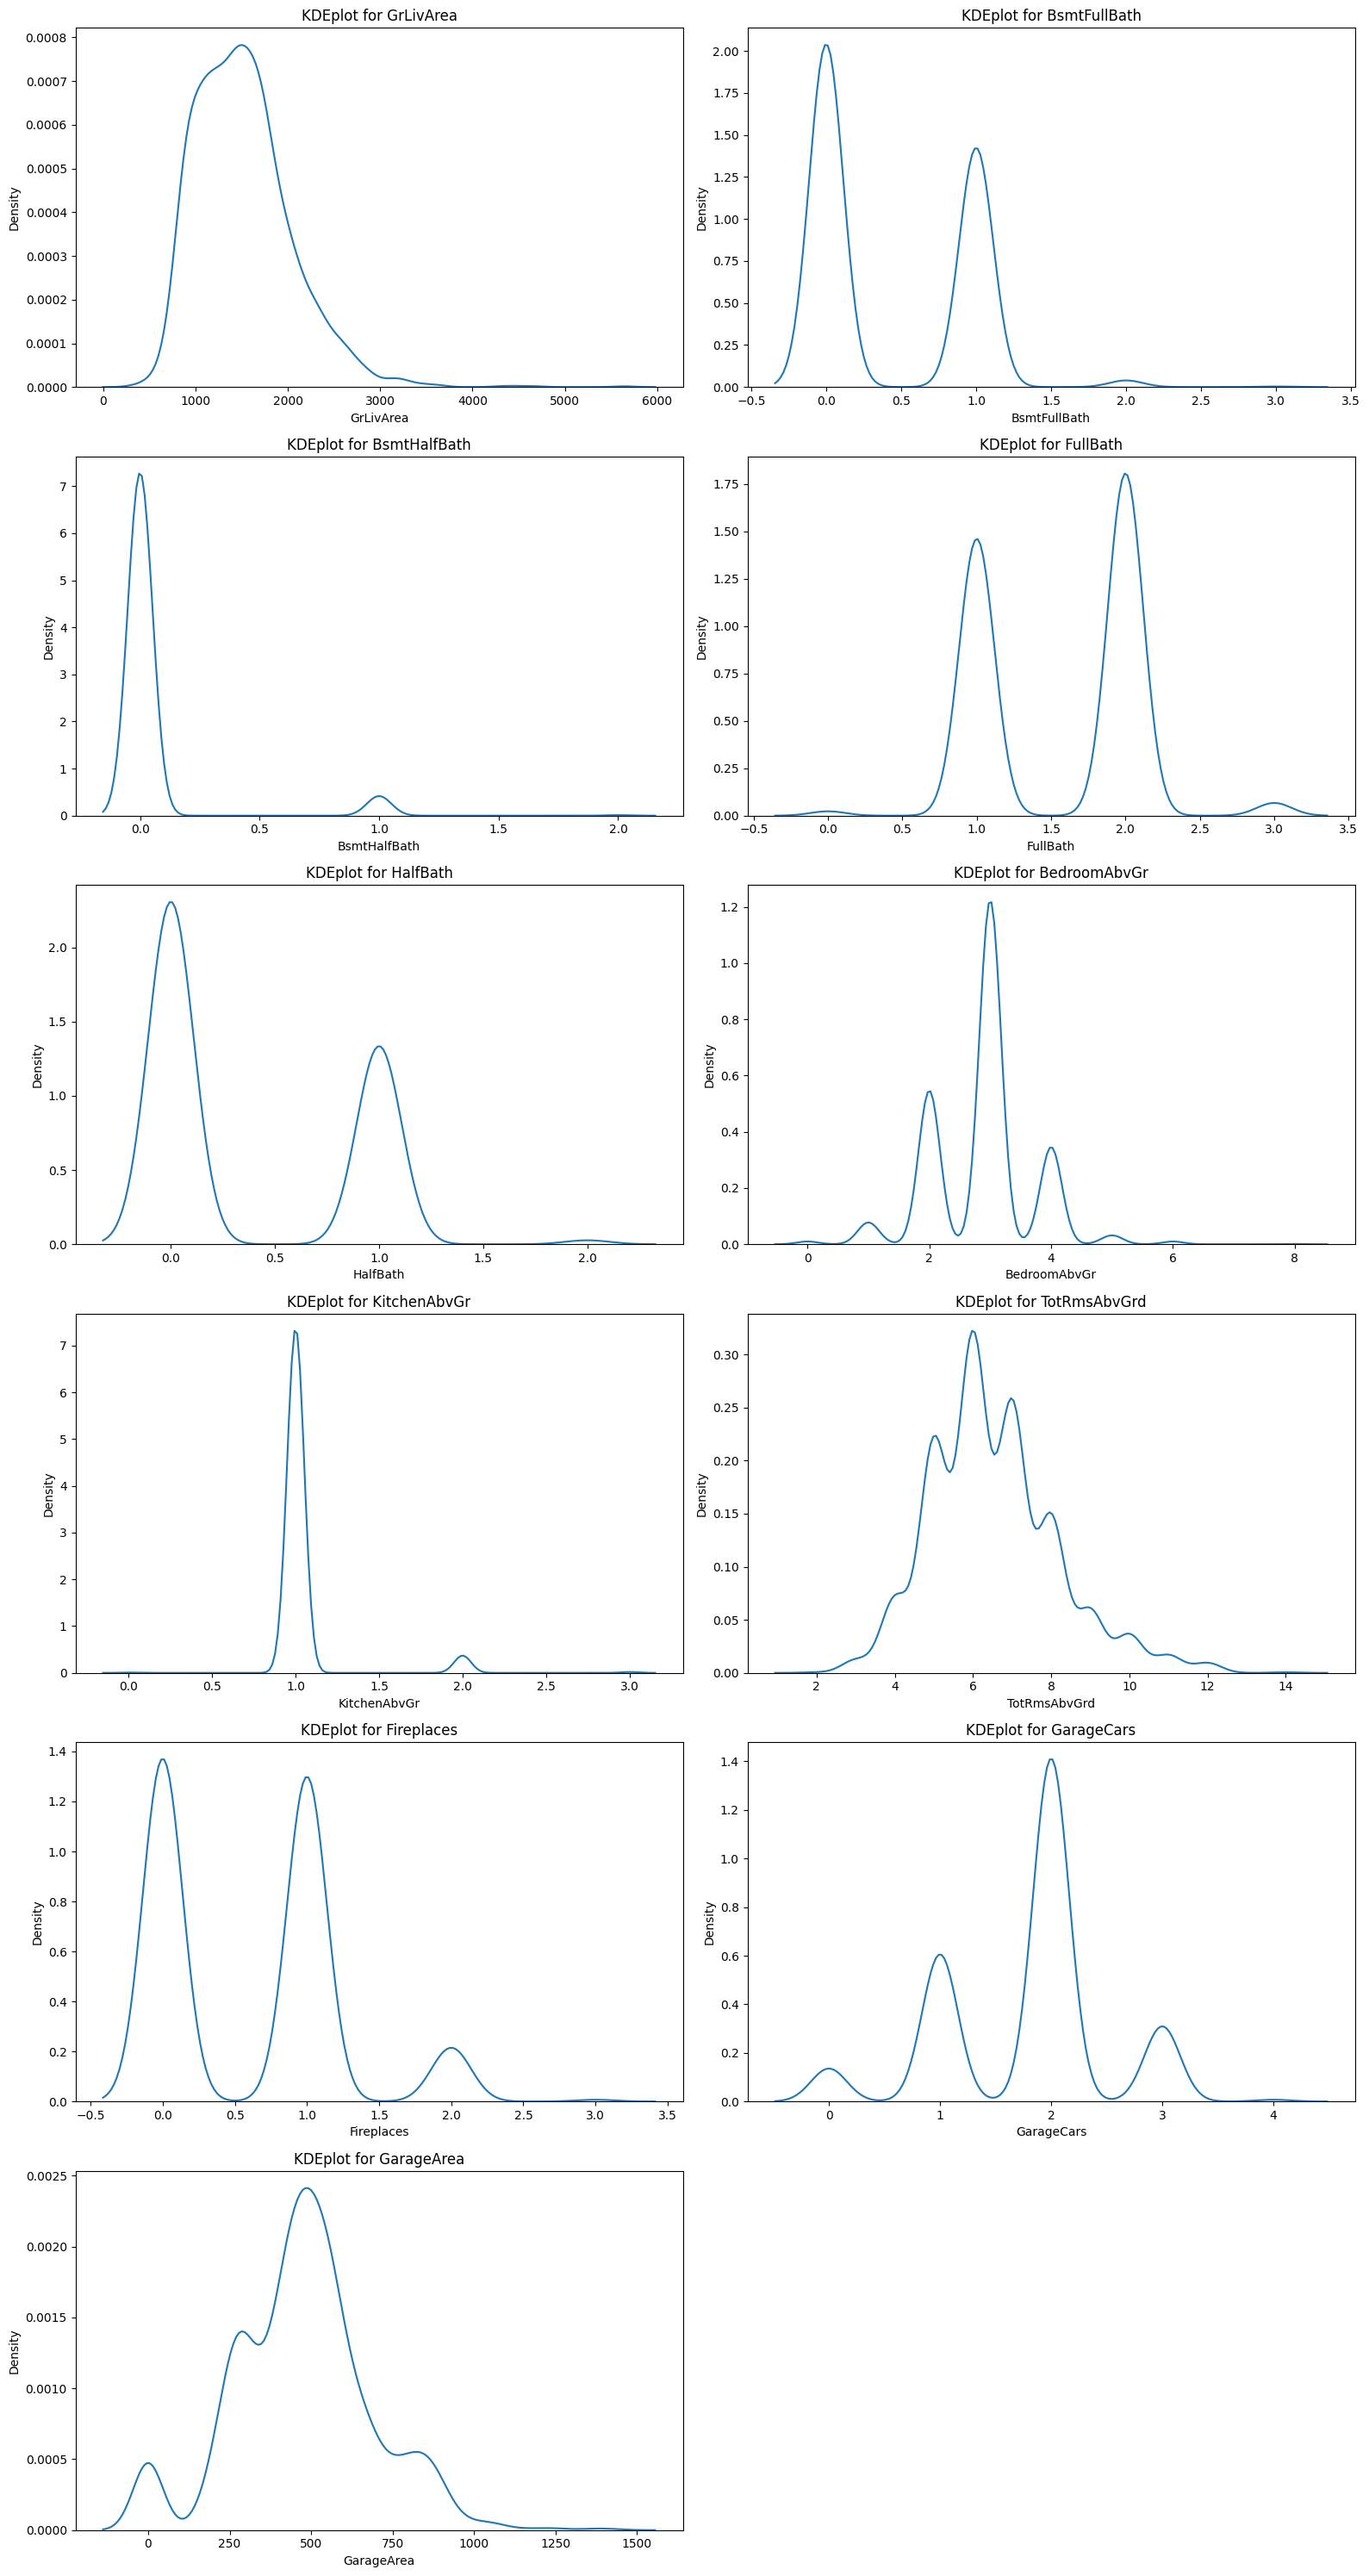

In [136]:
cols =  ['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea']

plt.figure(figsize=(16,30))  # height = 16, width = 35
for i in range(len(cols)):
    plt.subplot(6,2,i+1)  # rows = 6,cols=2
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for {cols[i]}')

plt.tight_layout()
plt.show()

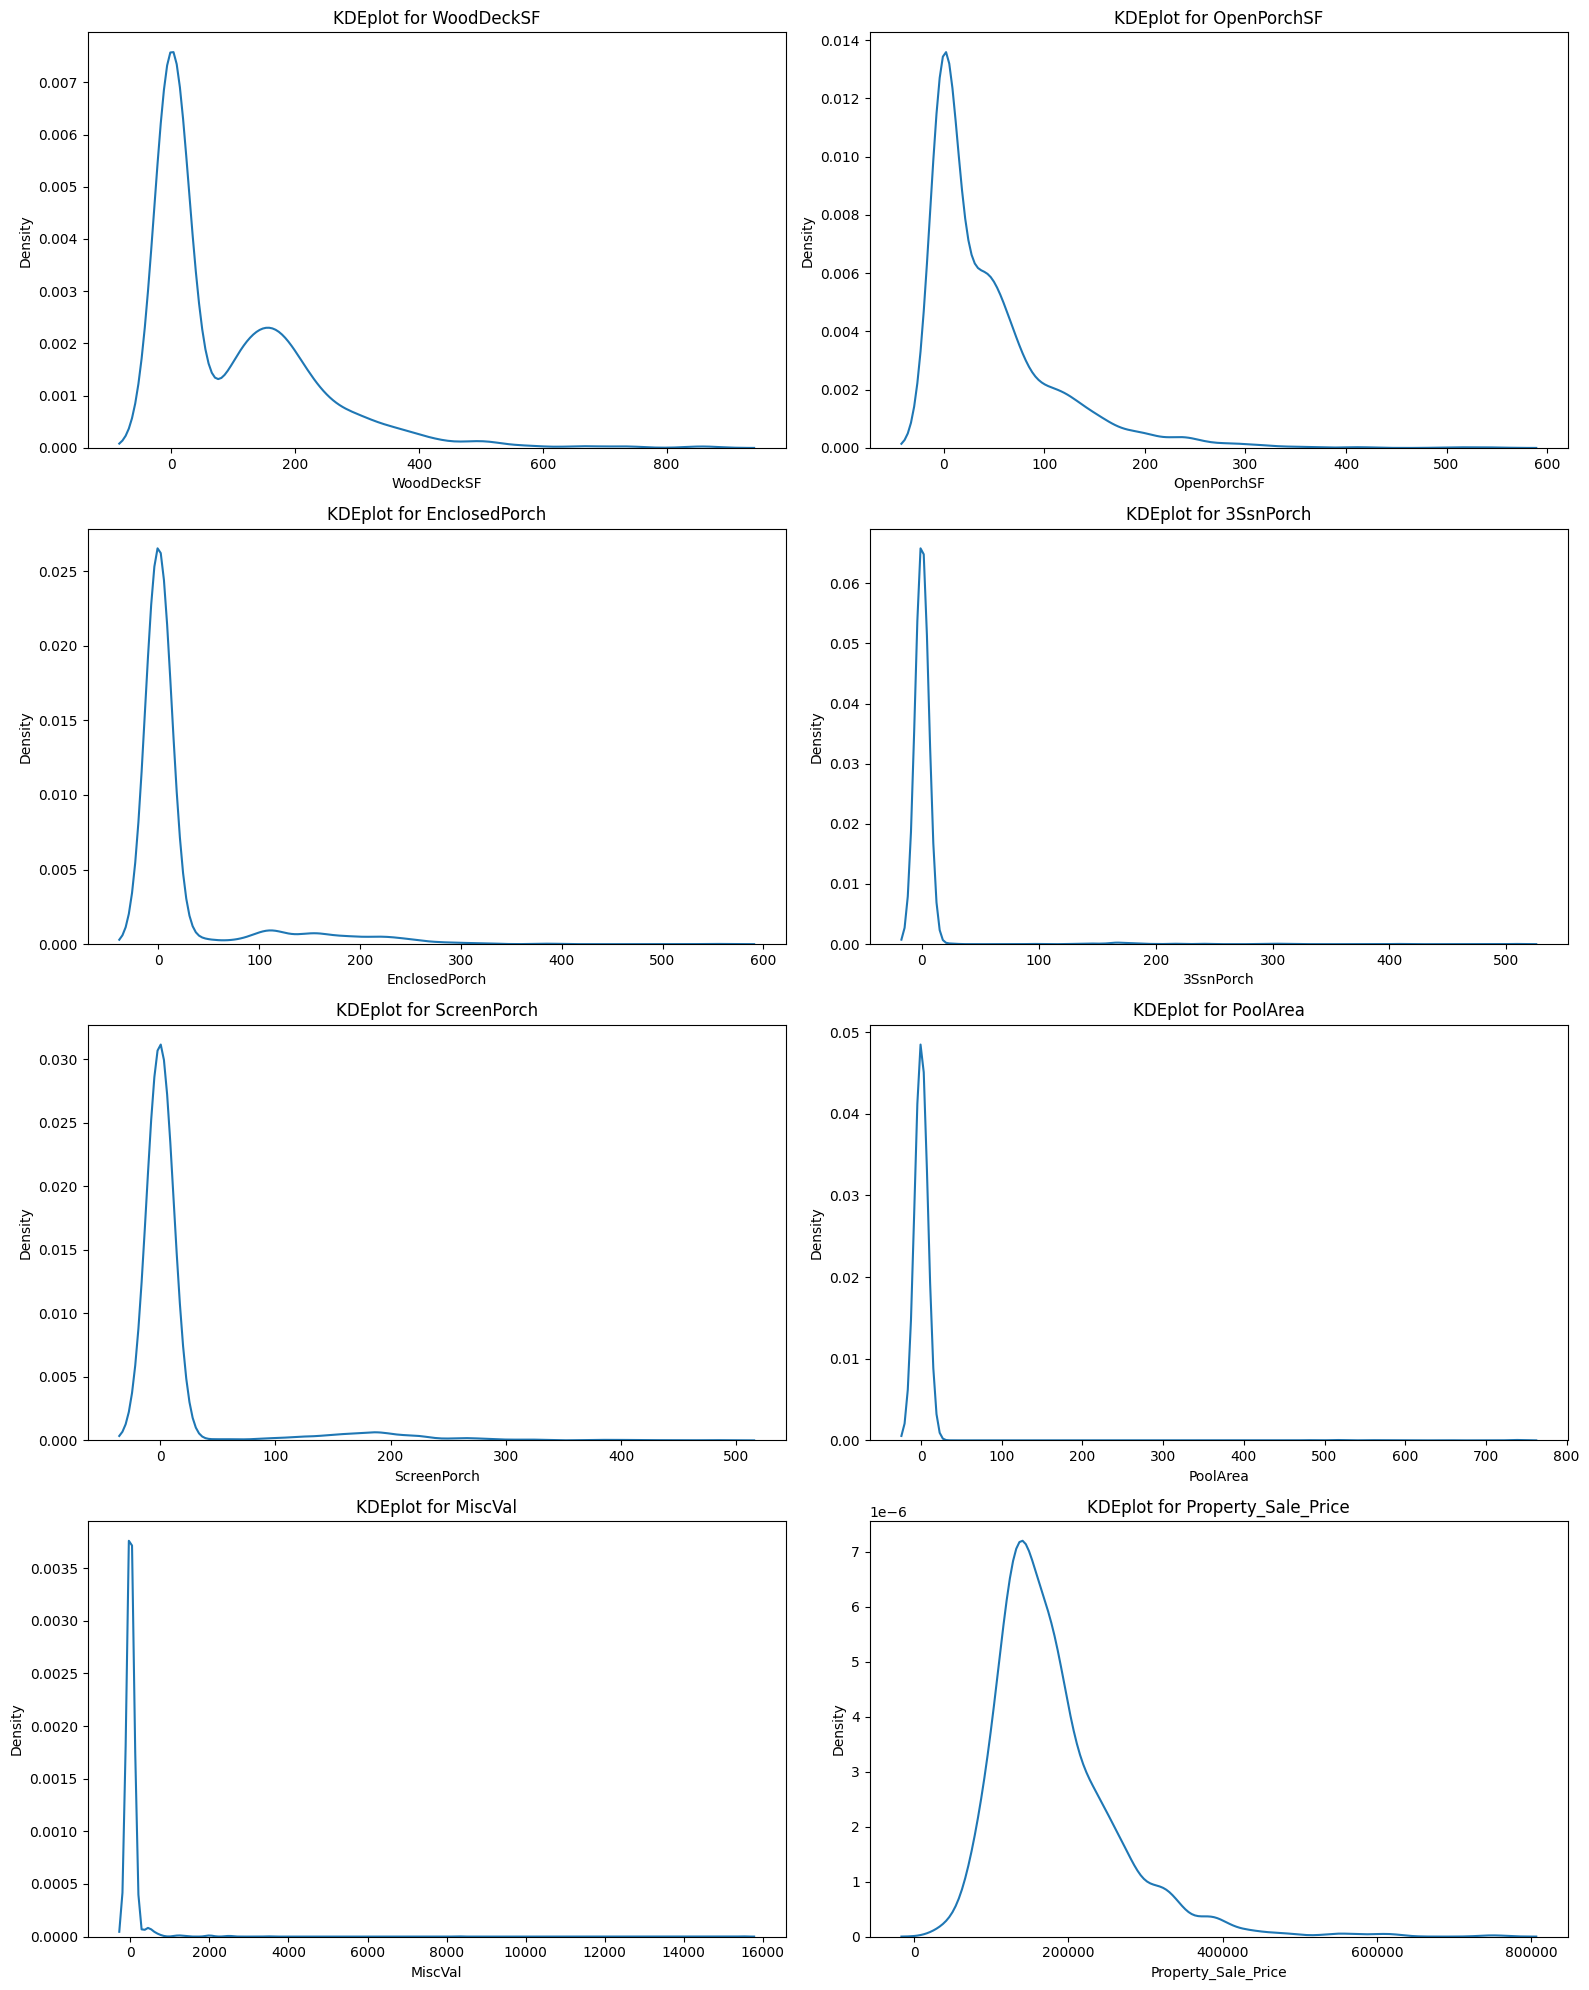

In [137]:
cols = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','Property_Sale_Price']

plt.figure(figsize=(16,20))  # height = 16, width = 35
for i in range(len(cols)):
    plt.subplot(4,2,i+1)  # rows = 6,cols=2
    sns.kdeplot(x=df[cols[i]])
    plt.title(f'KDEplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [138]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

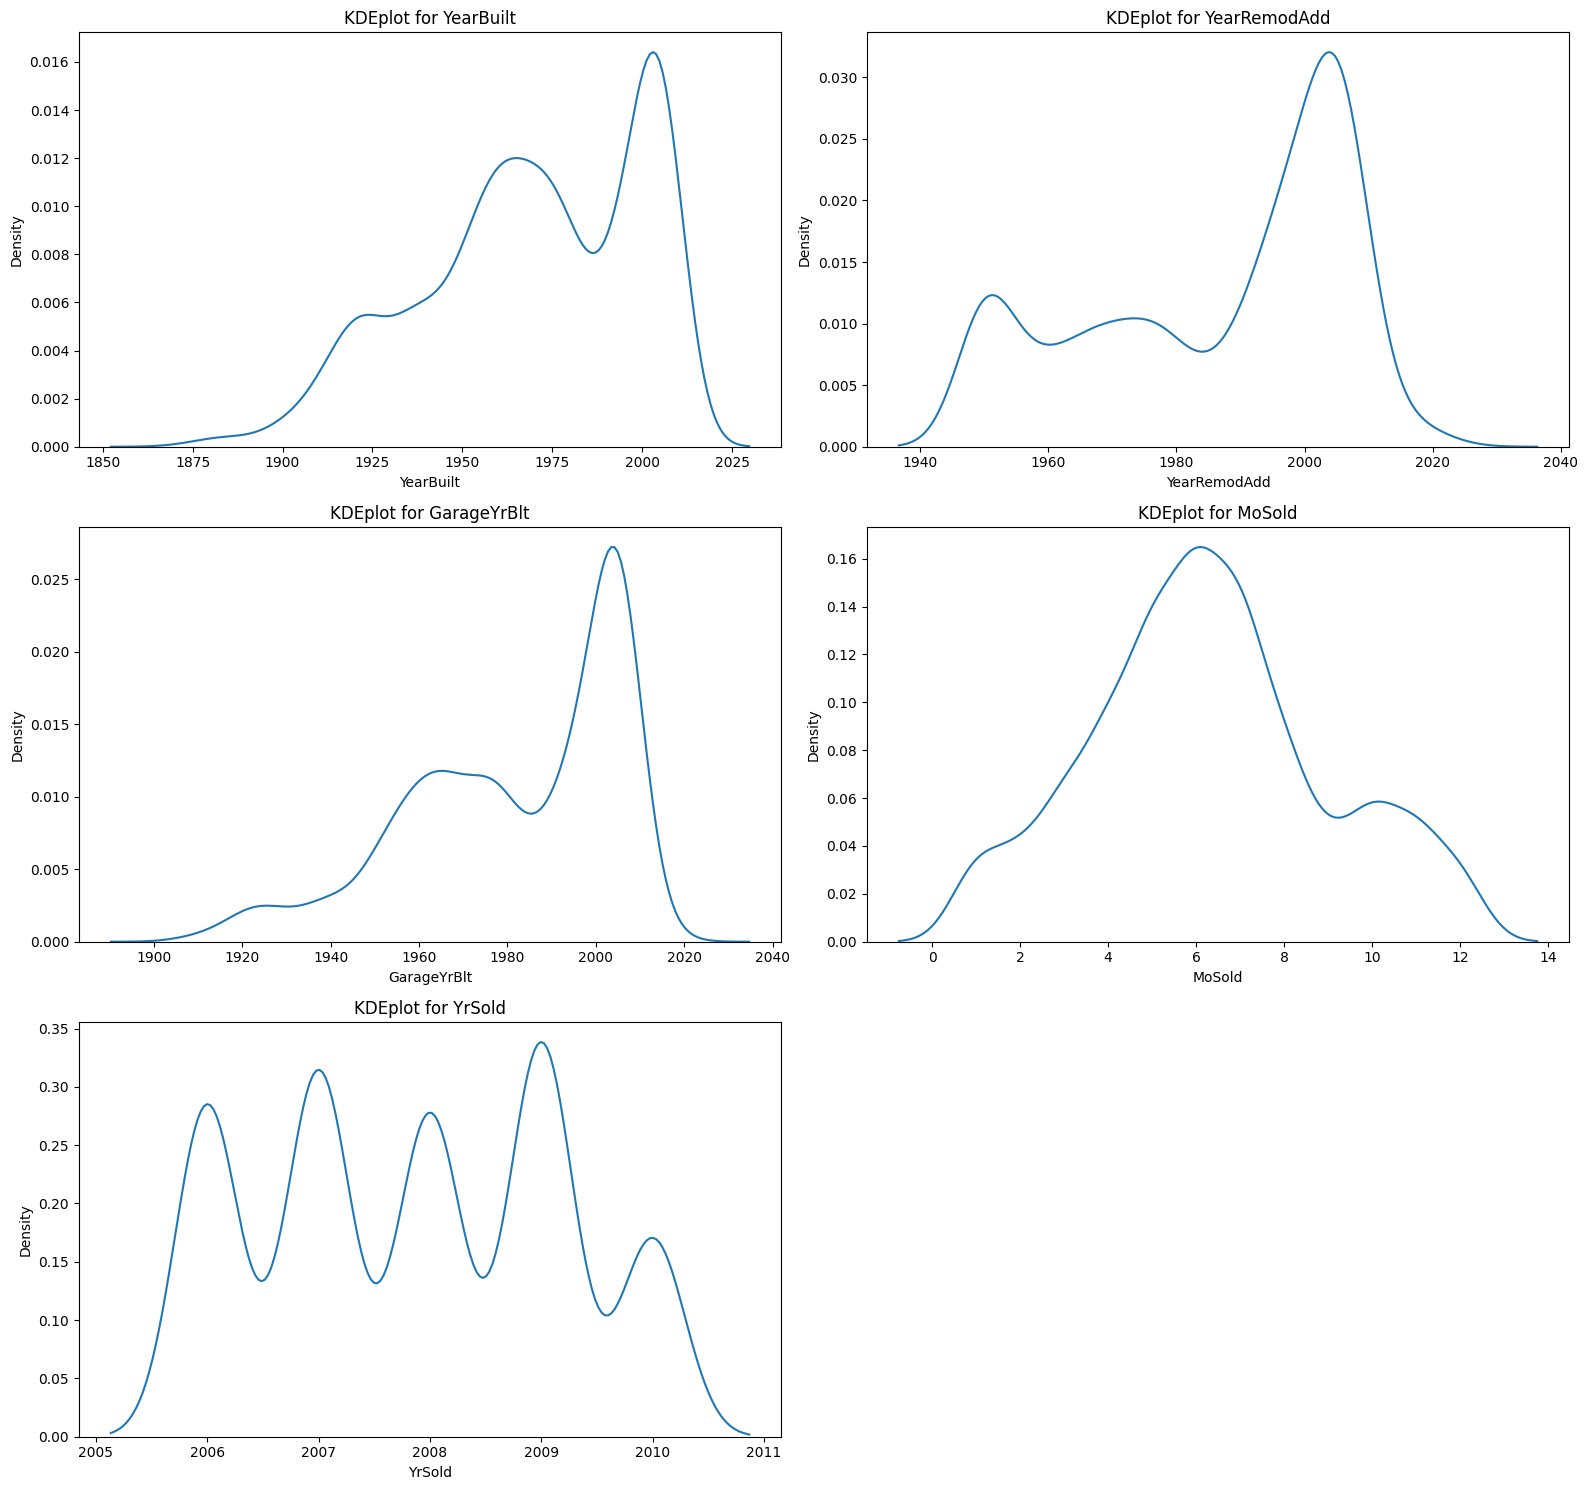

In [139]:
dt_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
                  'MoSold', 'YrSold']

plt.figure(figsize=(16,15))  # height = 16, width = 35
for i in range(len(dt_cols)):
    plt.subplot(3,2,i+1)  # rows = 6,cols=2
    sns.kdeplot(x=df[dt_cols[i]])
    plt.title(f'KDEplot for {dt_cols[i]}')

plt.tight_layout()
plt.show()

#### Bivariate - Num-Num

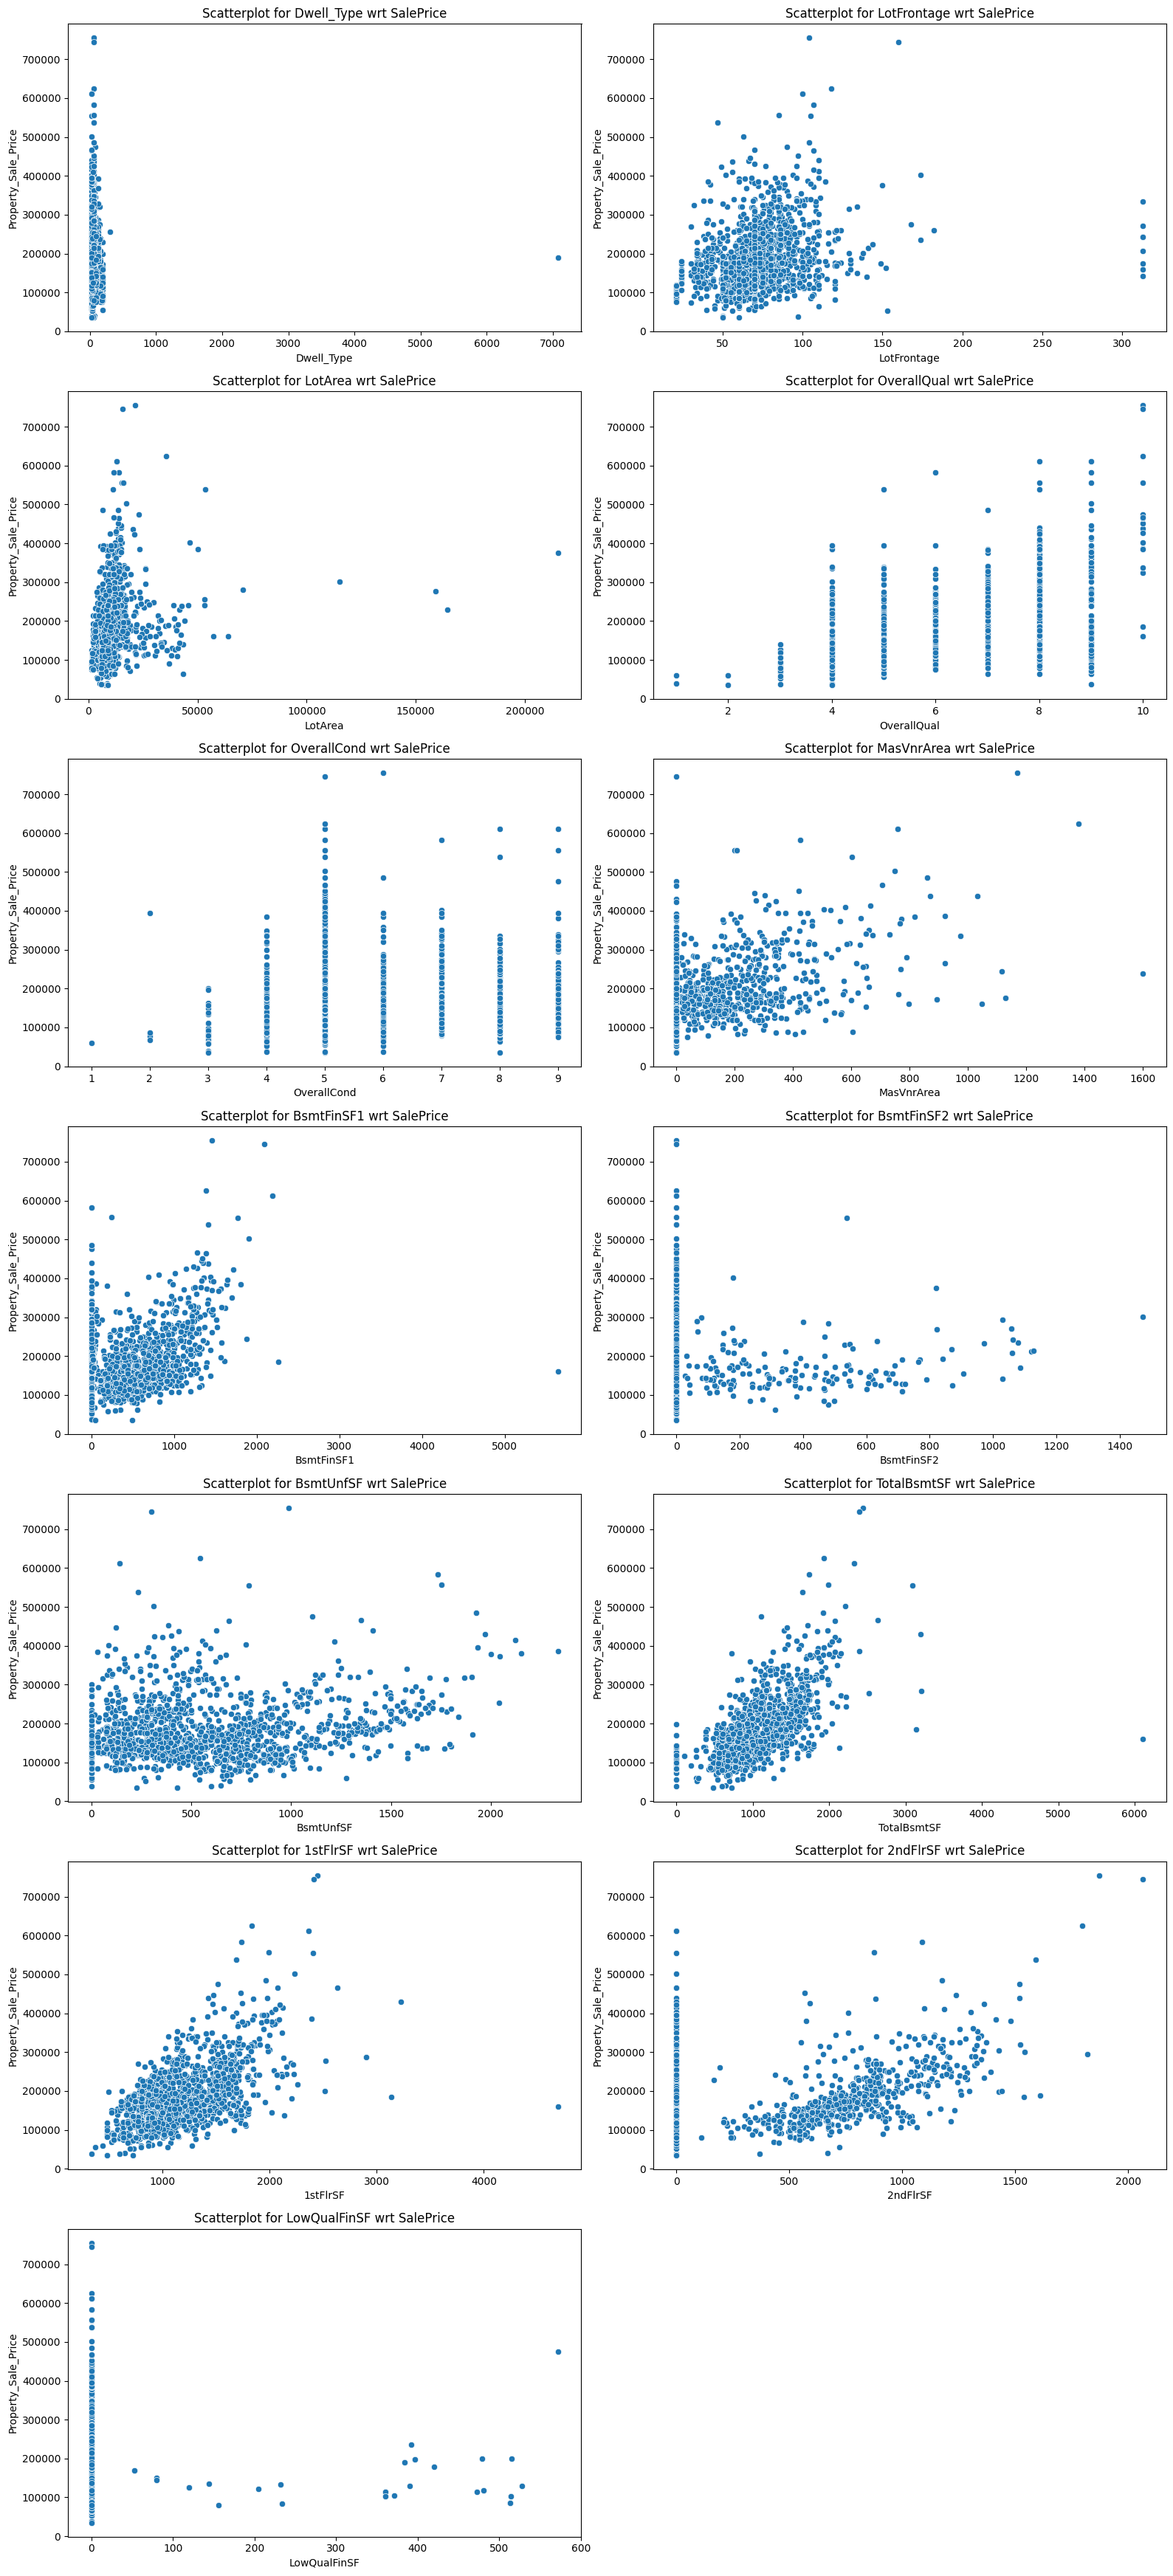

In [140]:
cols = ['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF']

plt.figure(figsize=(16,35))  # height = 16, width = 35
for i in range(len(cols)):
    plt.subplot(7,2,i+1)  # rows = 7,cols=2
    sns.scatterplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} wrt SalePrice')

plt.tight_layout()
plt.show()

#### Inference
1) DwellType and LowQualFinSF have majority values concentrated around 0 and hence they have minimal impact on target. 

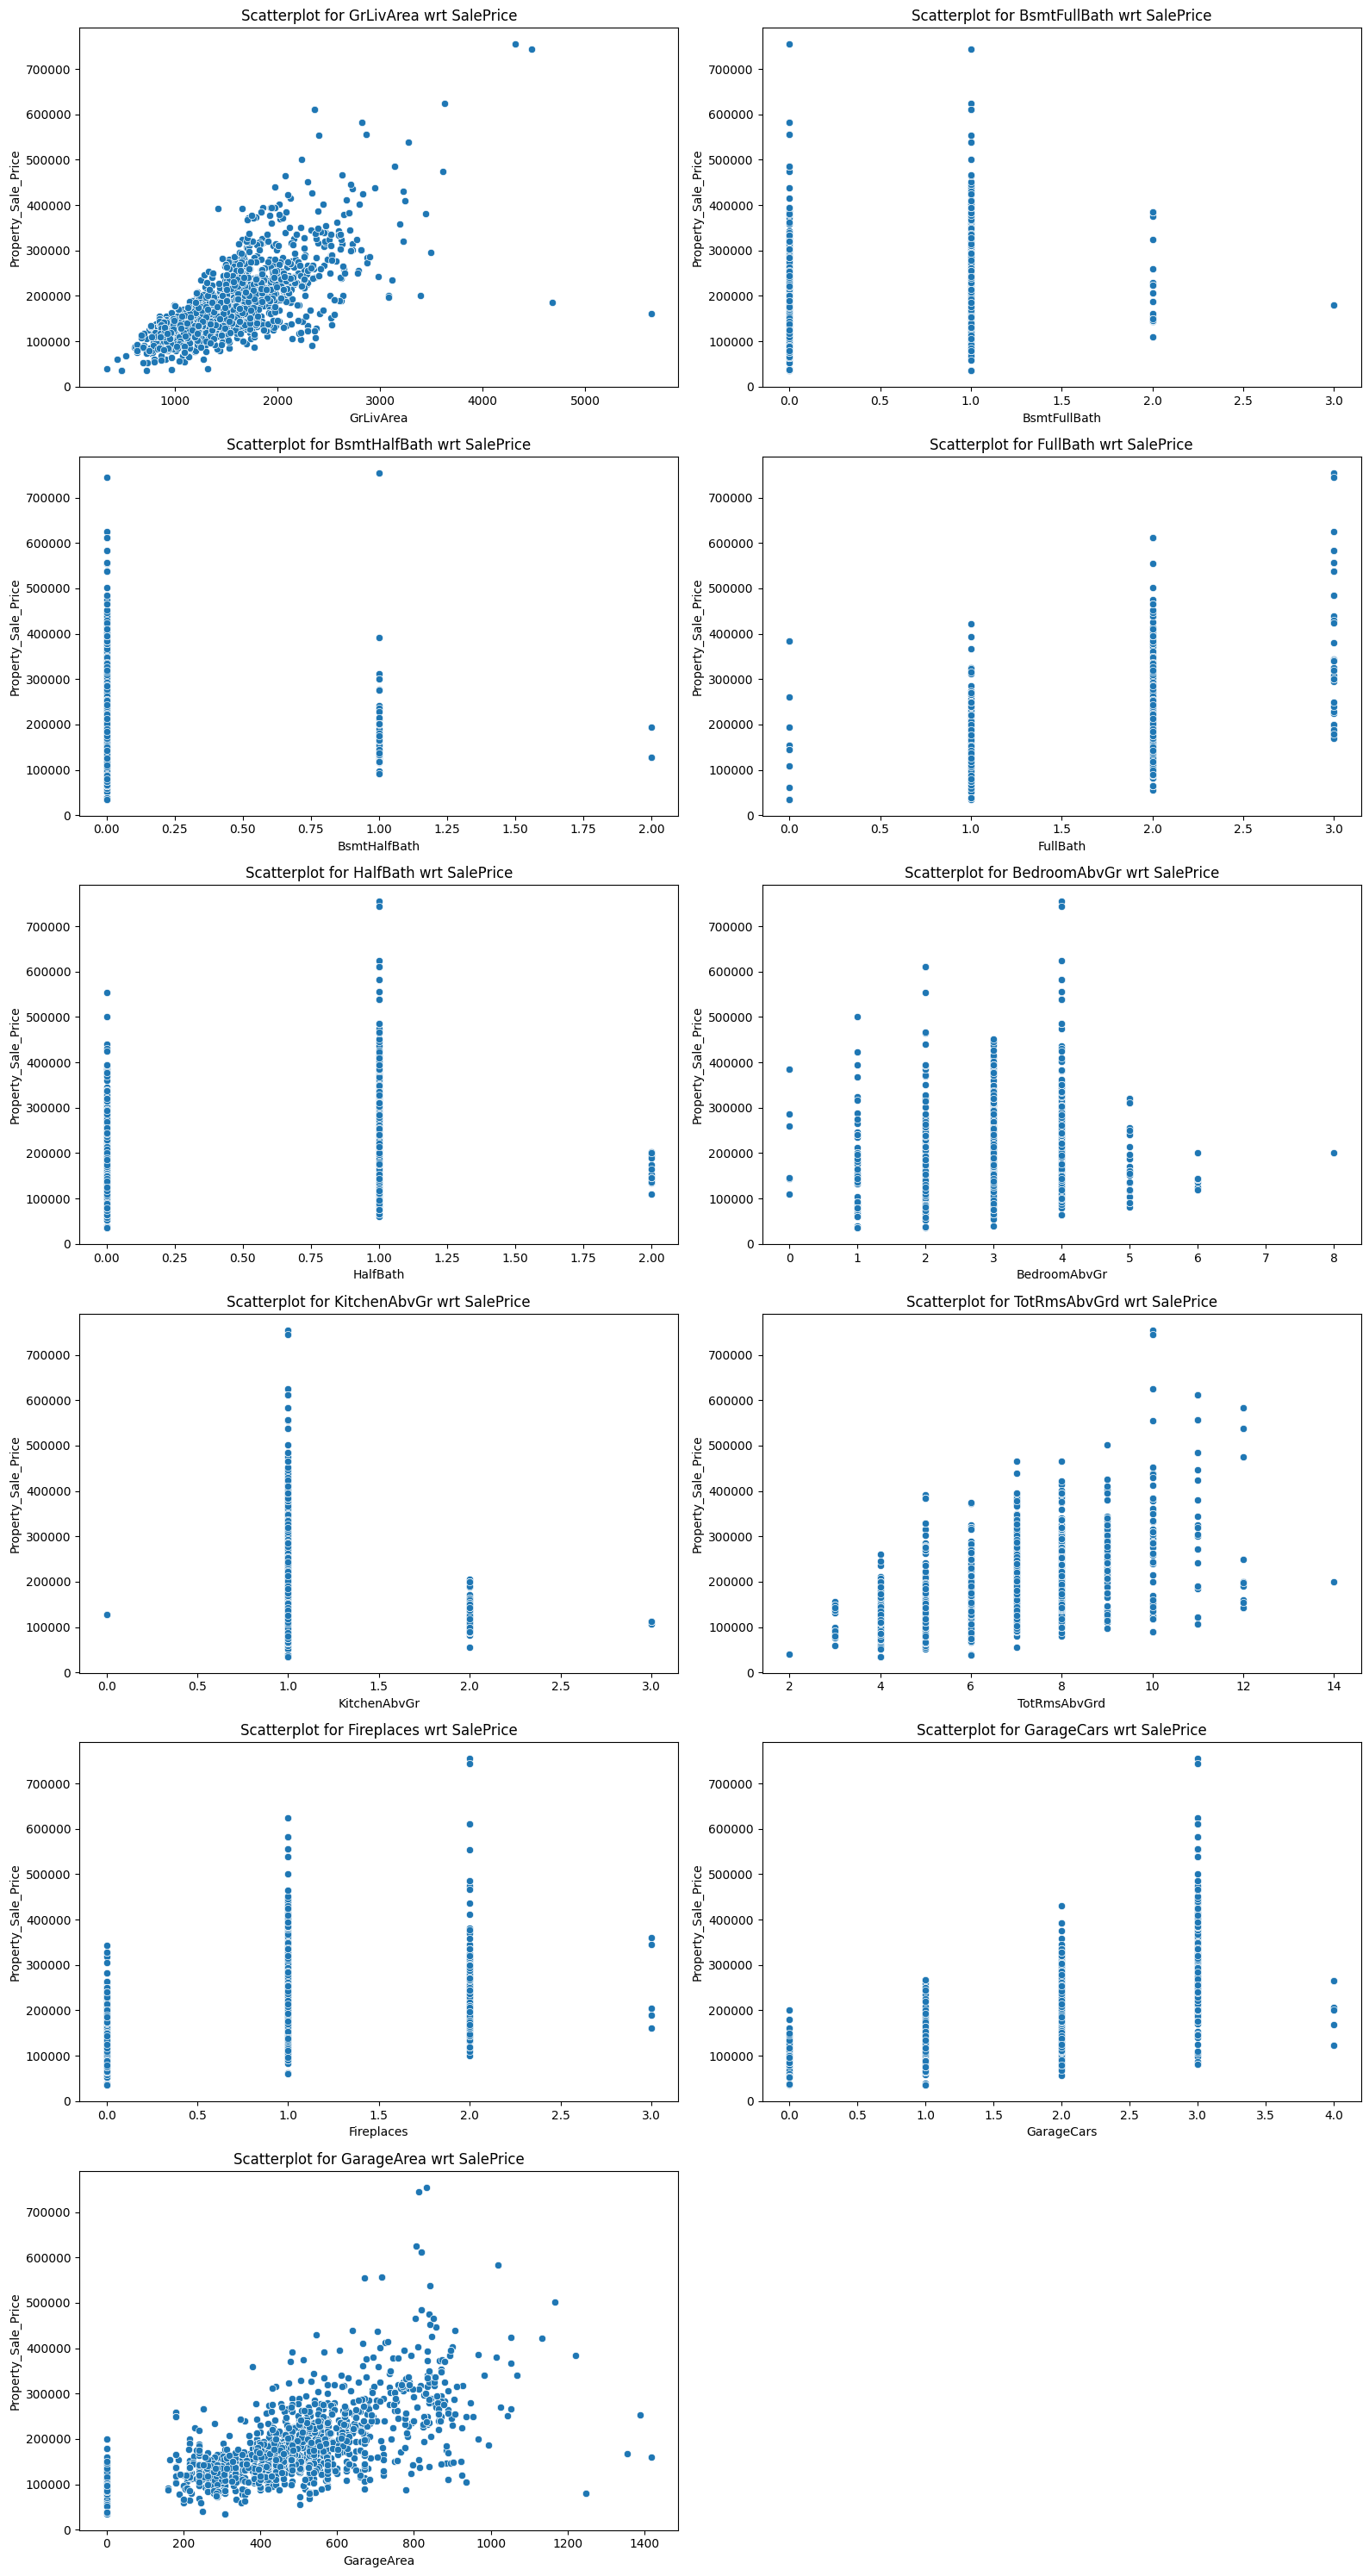

In [141]:
cols =  ['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea']

plt.figure(figsize=(16,30))  # height = 16, width = 35
for i in range(len(cols)):
    plt.subplot(6,2,i+1)  # rows = 6,cols=2
    sns.scatterplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} wrt SalePrice')

plt.tight_layout()
plt.show()

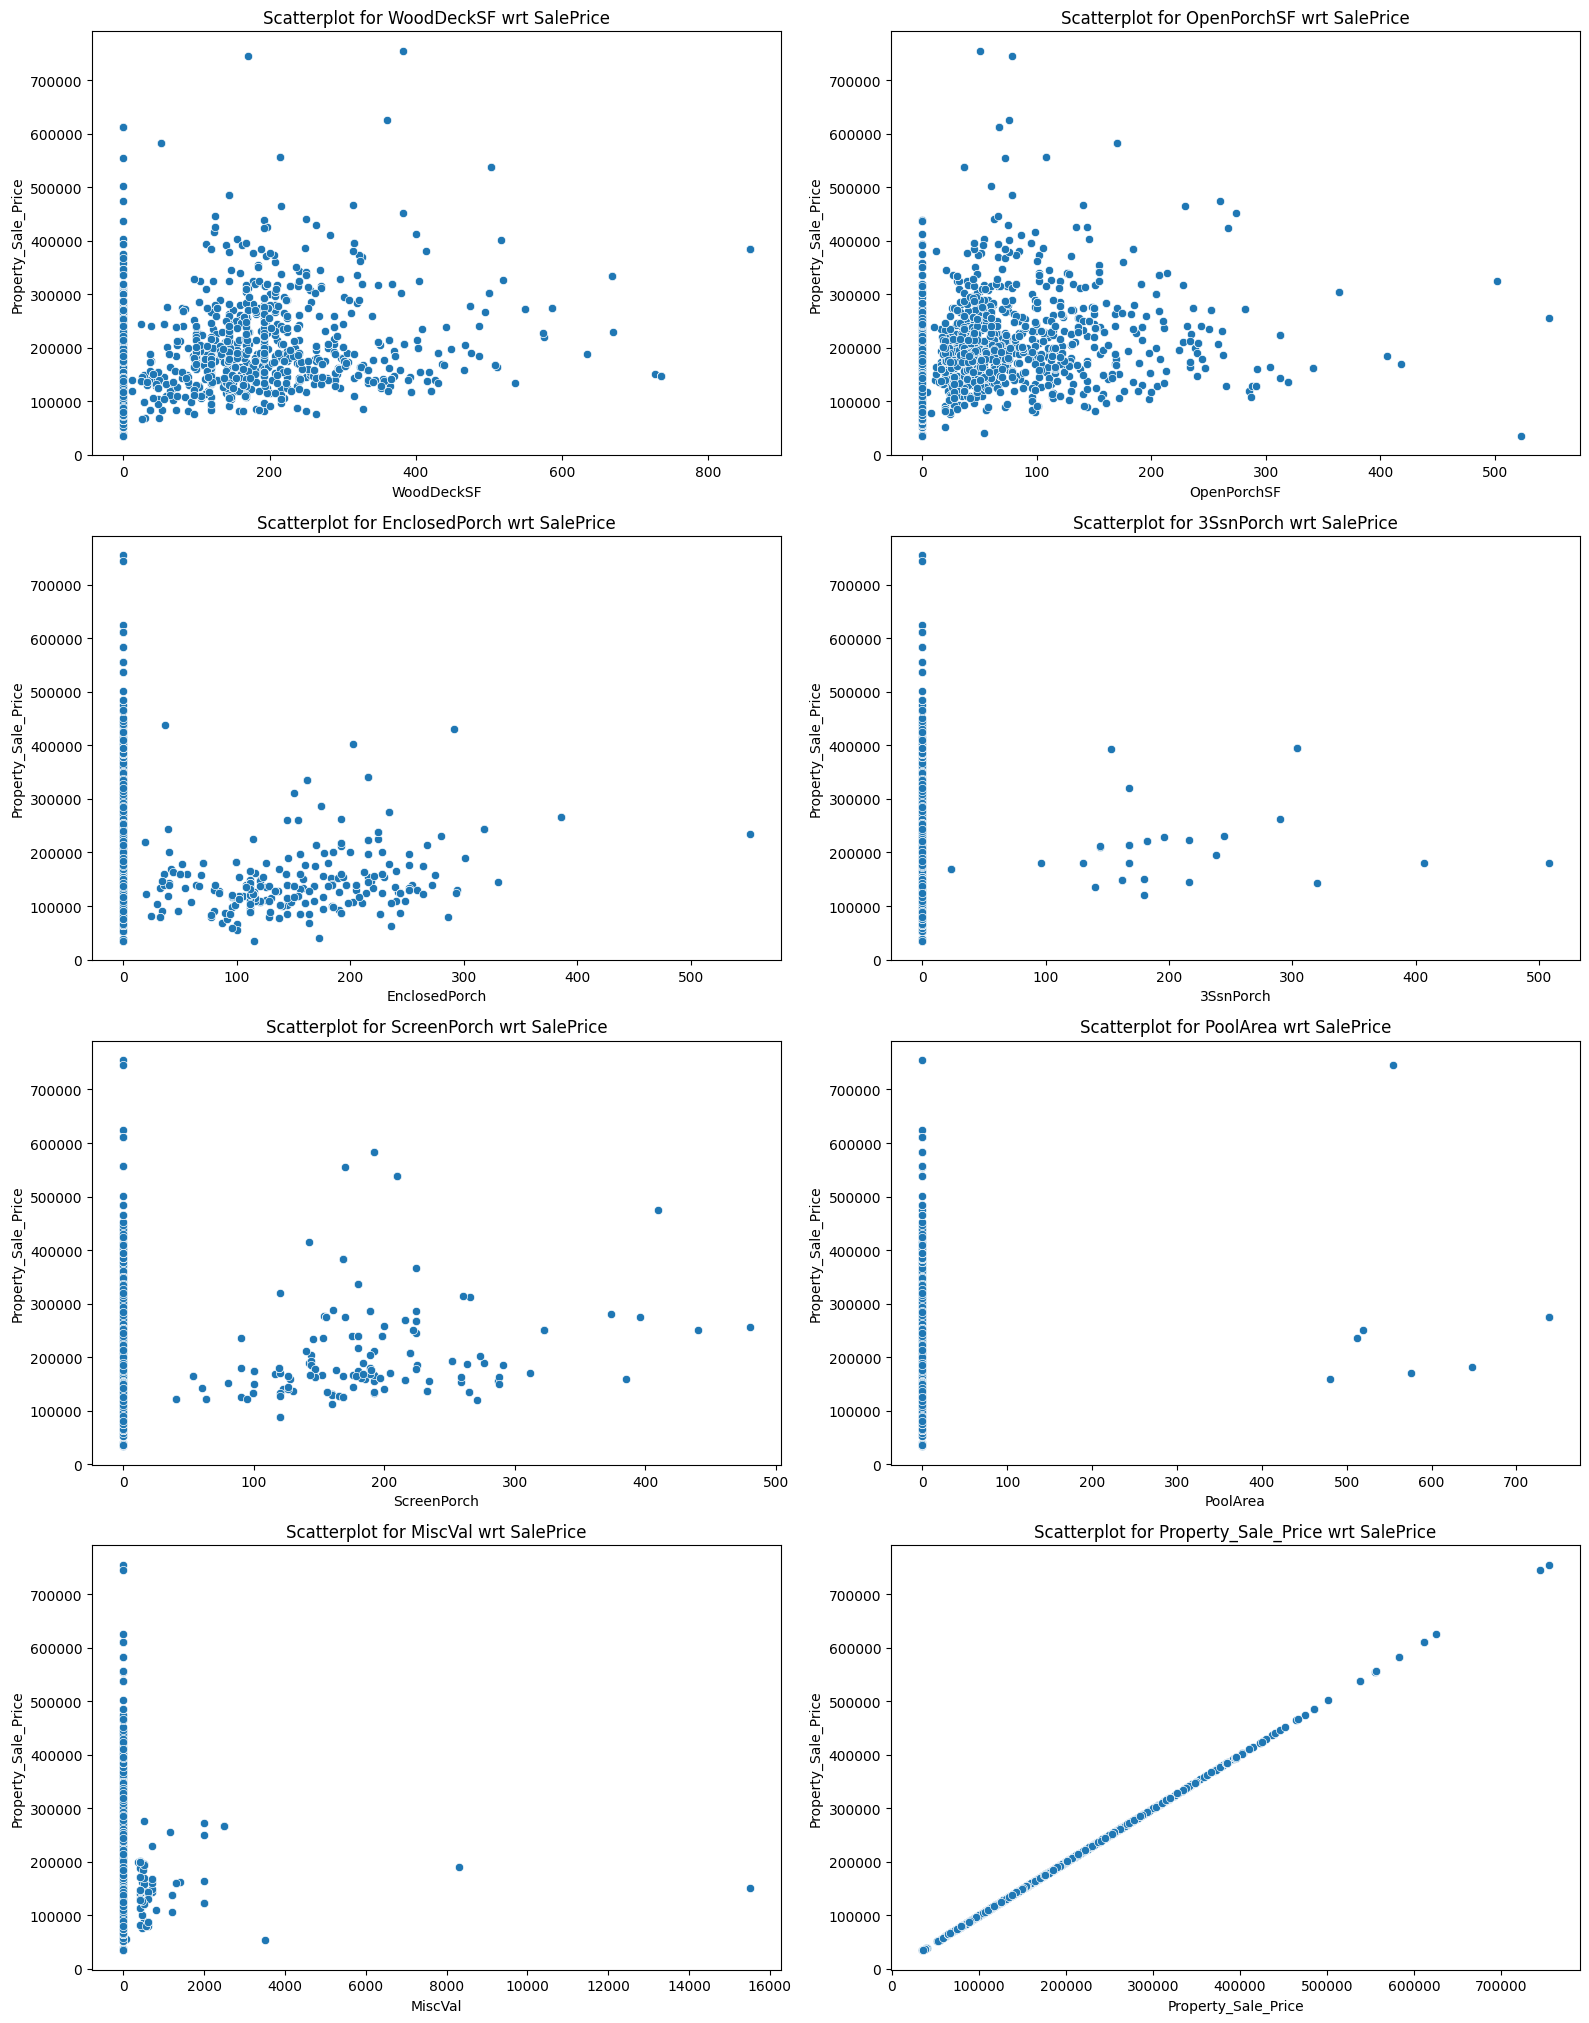

In [142]:
cols = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal','Property_Sale_Price']

plt.figure(figsize=(16,30))  # height = 16, width = 35
for i in range(len(cols)):
    plt.subplot(6,2,i+1)  # rows = 6,cols=2
    sns.scatterplot(x=df[cols[i]],y=df['Property_Sale_Price'])
    plt.title(f'Scatterplot for {cols[i]} wrt SalePrice')

plt.tight_layout()
plt.show()

In [143]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

#### Count of Rows containing 0 values

In [144]:
cols = ['Dwell_Type','LowQualFinSF','3SsnPorch','PoolArea','MiscVal']
for i in cols:
    print(i,df[df[i]==0].shape[0])

Dwell_Type 0
LowQualFinSF 2020
3SsnPorch 2027
PoolArea 2051
MiscVal 1983


In [145]:
df['Dwell_Type'].describe()

count    2059.000000
mean       60.569694
std       160.434497
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max      7080.000000
Name: Dwell_Type, dtype: float64

In [146]:
df['Dwell_Type'].value_counts()

Dwell_Type
20      717
60      428
50      205
30      132
120     114
90       88
80       77
70       77
160      77
190      42
85       34
75       19
180      14
45       13
150      13
40        7
303       1
7080      1
Name: count, dtype: int64

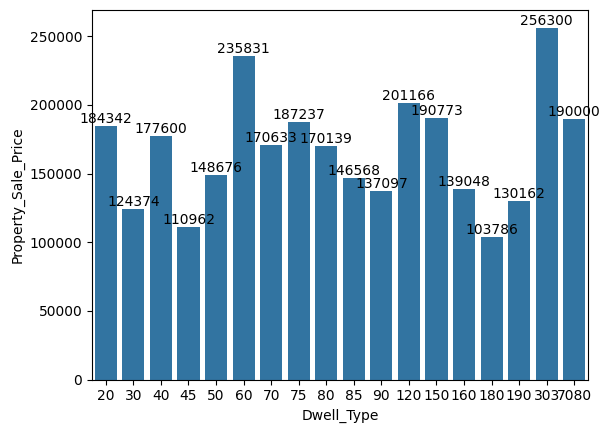

In [147]:
ax = sns.barplot(x=df['Dwell_Type'],y=df['Property_Sale_Price'],errorbar=('ci',0))
ax.bar_label(ax.containers[0])
plt.show()

In [148]:
cat_cols

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [149]:
d2= df.copy()
df.shape

(2059, 78)

In [150]:
cols_to_drop2 = ['Road_Type','Utilities','Condition2','RoofMatl',
                'Heating','Functional','LowQualFinSF','3SsnPorch','PoolArea','MiscVal']

df.drop(cols_to_drop2,axis=1,inplace=True)
df.shape

(2059, 68)

In [151]:
df.shape

(2059, 68)

### Corr

1) Corr between target var and indepenent feature. <br>
2) Corr amongst independent feature - Multicollinearity.

In [152]:
num_cols = df.dtypes[df.dtypes!='object'].index
len(num_cols)

34

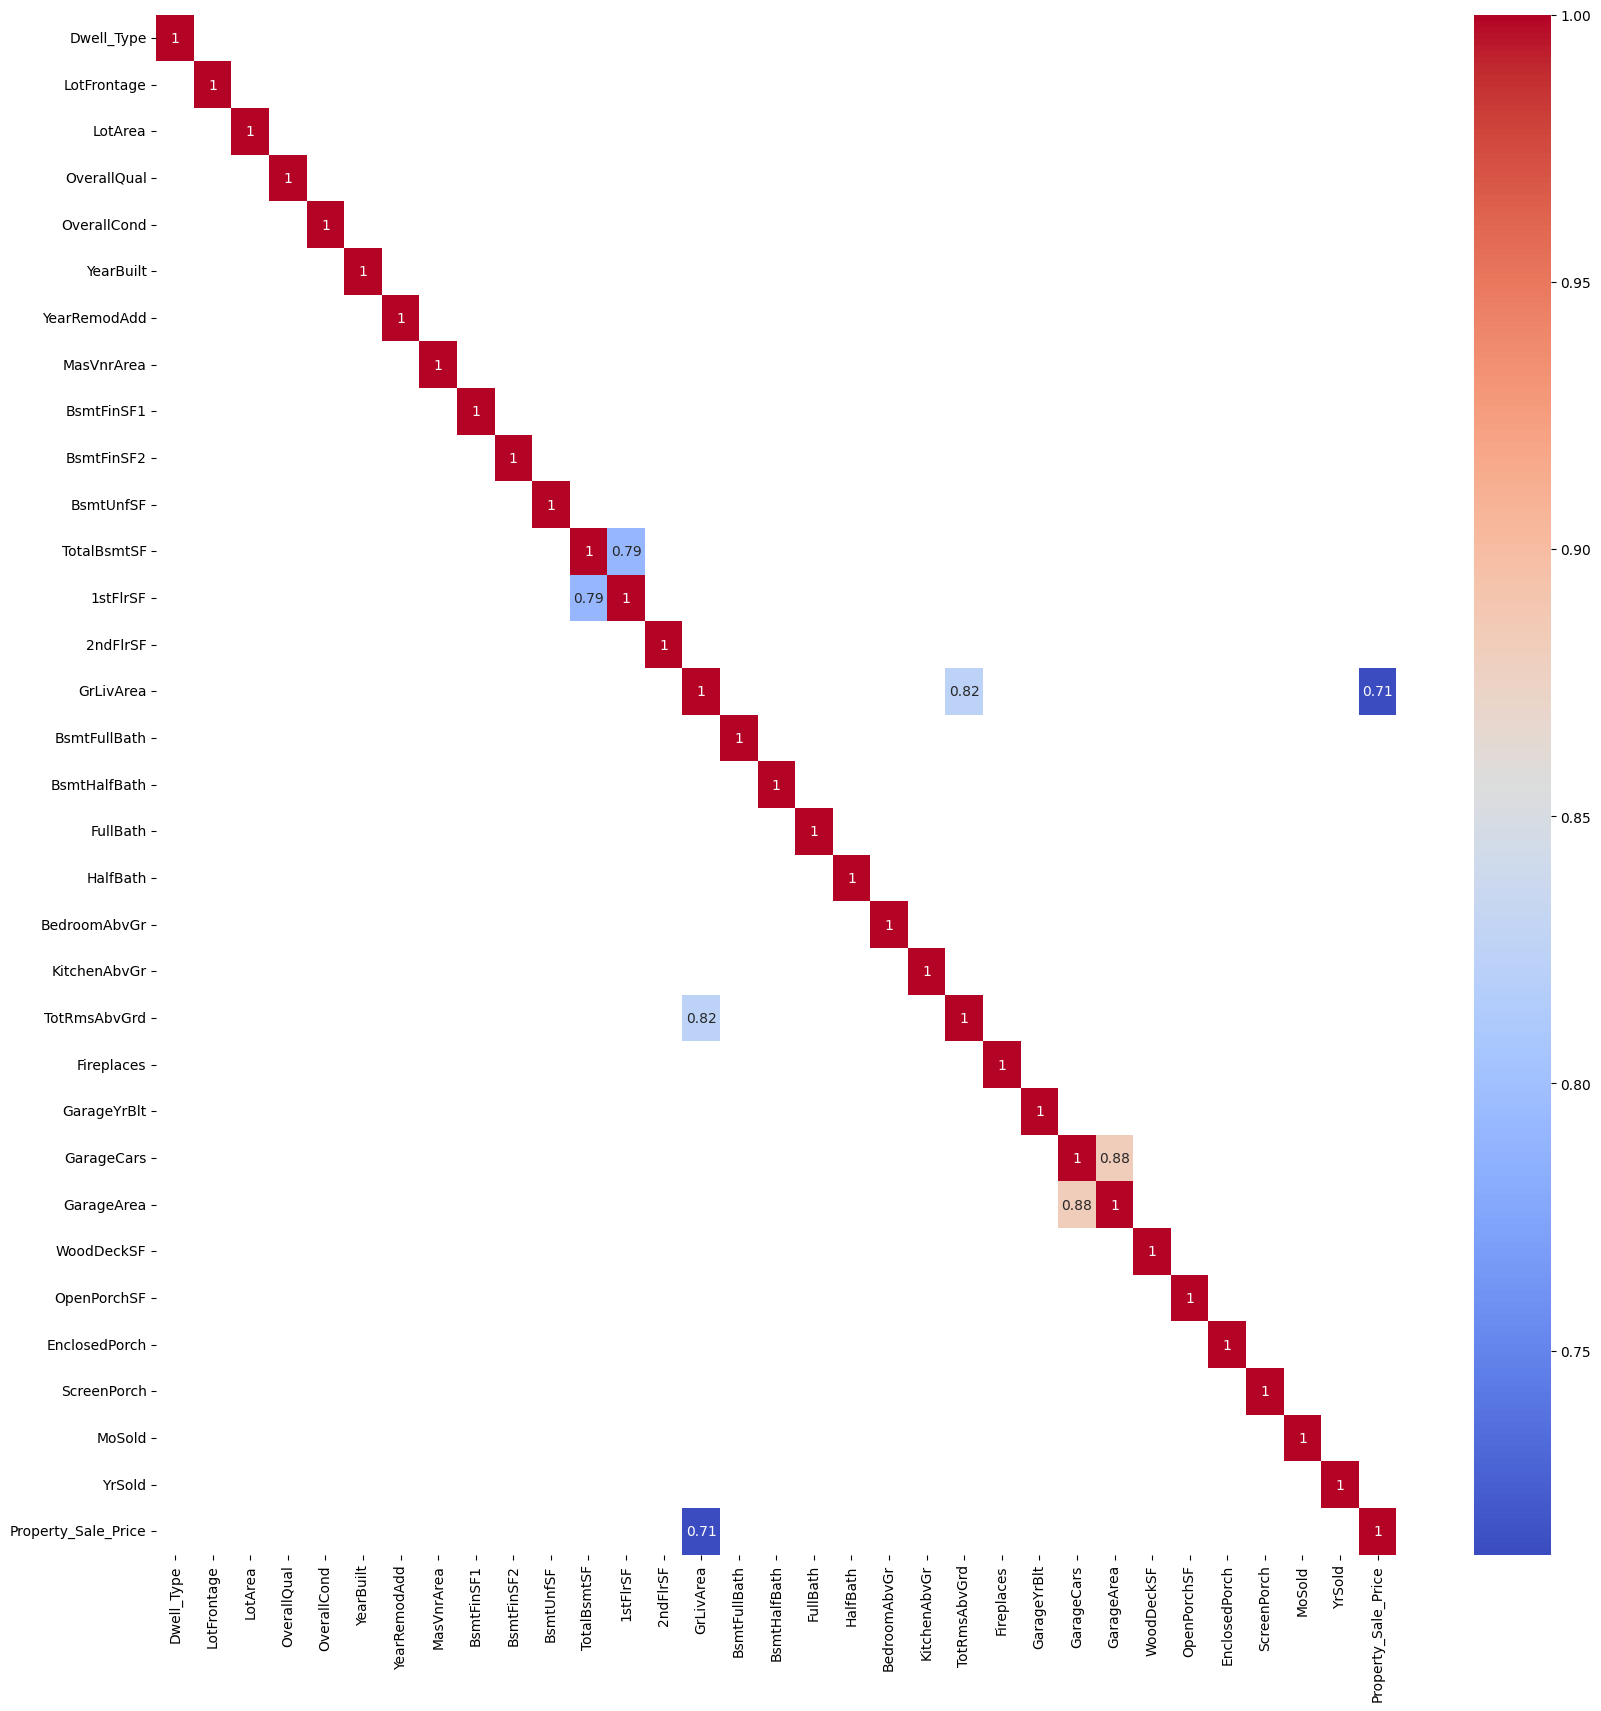

In [153]:
corr = df[num_cols[1:]].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7], annot=True,cmap='coolwarm')
plt.show()

#### Inference
<pre>
1) GrLivArea and TotalRmsAbvGrd hae high corr = 0.82
2) GarageCars and GarageArea have high corr = 0.88
3) TotalBsmtSF and 1stFlrSF have high corr = 0.79

In [154]:
cols_to_drop3 = ['TotRmsAbvGrd','GarageCars','TotalBsmtSF']
print(df.shape)
df.drop(cols_to_drop3,axis=1,inplace=True)
print(df.shape)

(2059, 68)
(2059, 65)


### Outliers Treamtment

In [155]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)
len(num_cols)

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price'],
      dtype='object')


31

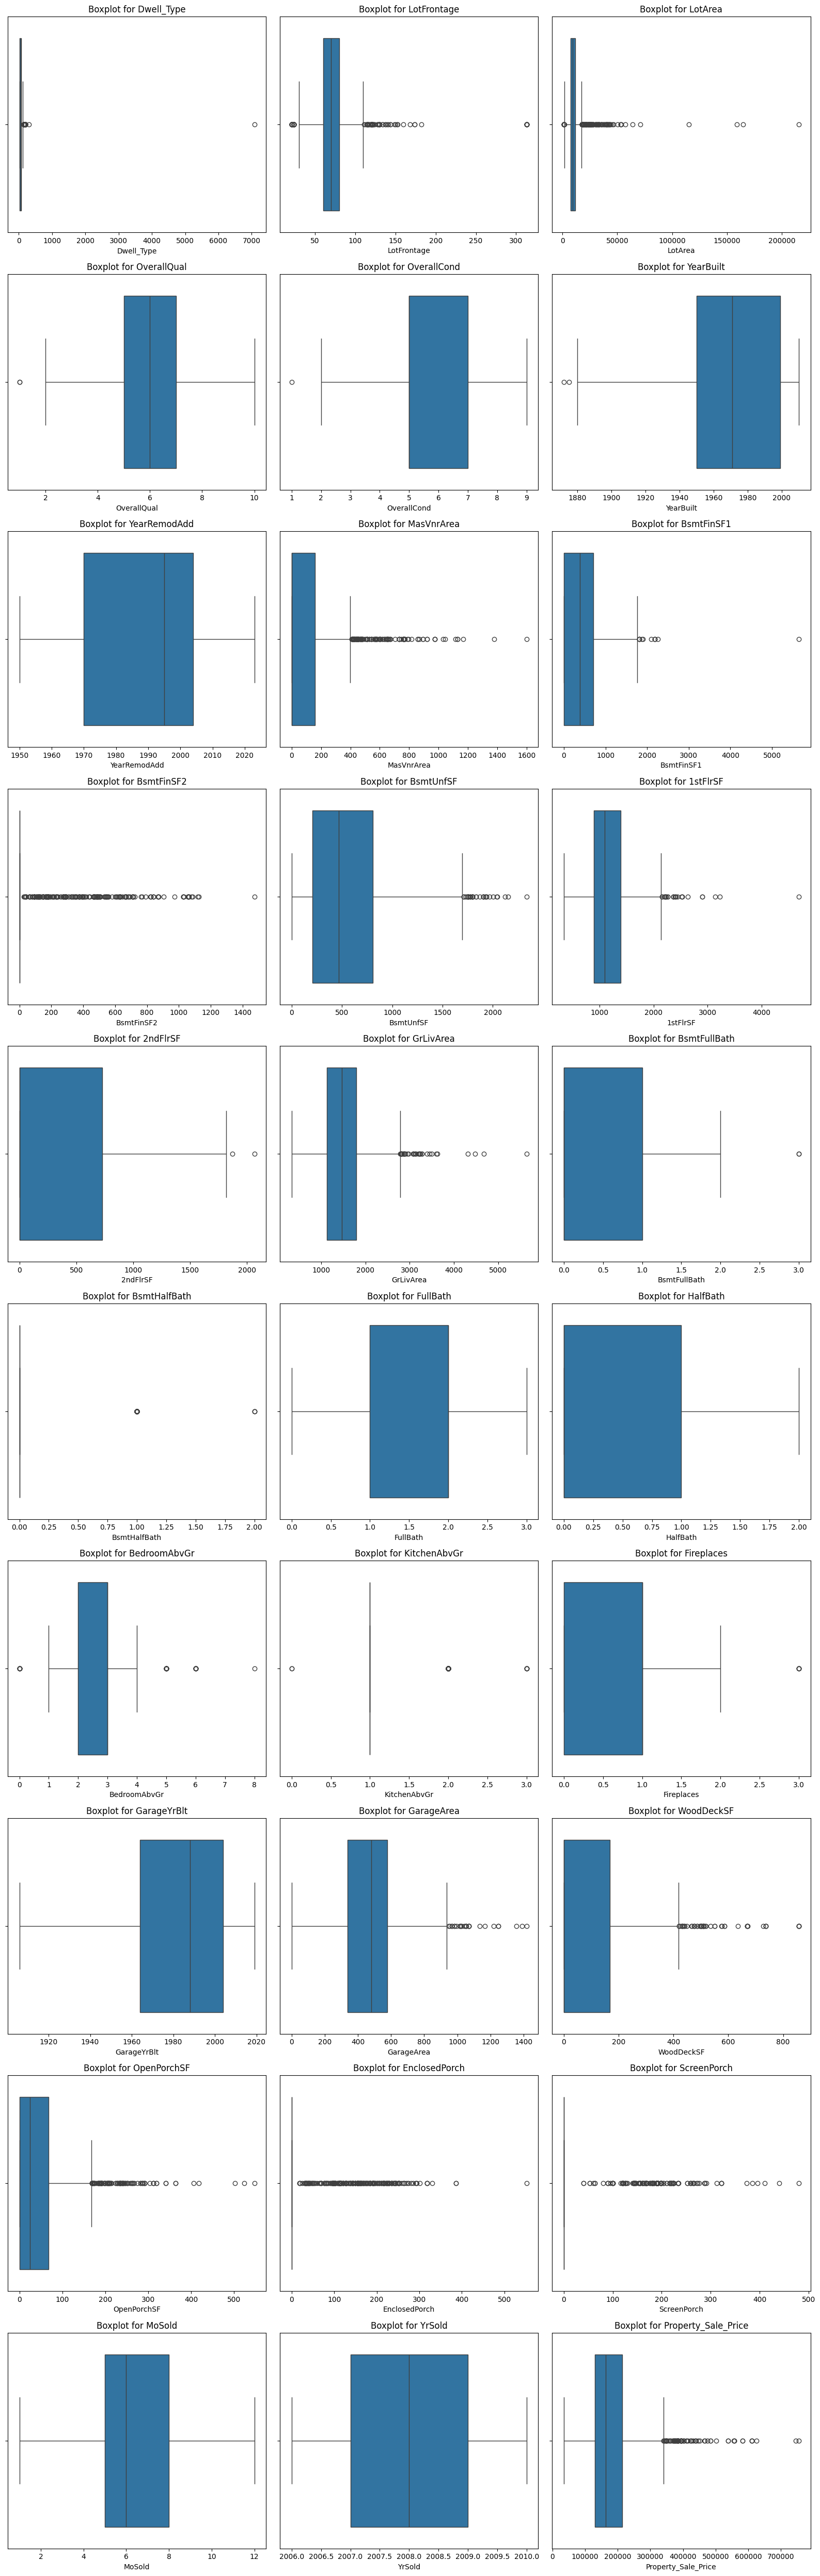

In [156]:
cols = num_cols[1:]

plt.figure(figsize=(16,50))  # height = 16, width = 50
for i in range(len(cols)):
    plt.subplot(10,3,i+1)  # rows = 10,cols=2
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### Methods of Outlier Treatment
<pre>
1) IQR approach = > values > bmax and values < bmin  = > Clipping/ capping
2) Extreme outlier treament => Clipping/capping
3) Winsorization => Clipping/capping
etc

In [158]:
df[df['MasVnrArea']>400].shape[0]

143

In [159]:
num_cols

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold',
       'Property_Sale_Price'],
      dtype='object')

In [160]:
df['LotArea'].quantile(0.02)

2268.0

In [161]:
cols = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Property_Sale_Price']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

min        1%        2%        3%       5%       50%  \
LotFrontage             21.0     21.00     24.00     32.00     36.0      70.0   
LotArea               1300.0   1881.18   2268.00   2645.00   3675.0    9497.0   
MasVnrArea               0.0      0.00      0.00      0.00      0.0       0.0   
BsmtFinSF1               0.0      0.00      0.00      0.00      0.0     383.0   
BsmtFinSF2               0.0      0.00      0.00      0.00      0.0       0.0   
BsmtUnfSF                0.0      0.00      0.00      0.00      0.0     466.0   
1stFlrSF               334.0    531.80    606.12    630.00    684.0    1095.0   
2ndFlrSF                 0.0      0.00      0.00      0.00      0.0       0.0   
GrLivArea              334.0    693.58    768.00    803.74    848.0    1470.0   
GarageArea               0.0      0.00      0.00      0.00      0.0     480.0   
WoodDeckSF               0.0      0.00      0.00      0.00      0.0       0.0   
OpenPorchSF              0.0      0.00      0.00      0.00      0.0      25.0   
EnclosedPorch            0.0      0.00      0.00      0.00      0.0       0.0   
ScreenPorch              0.0      0.00      0.00      0.00      0.0       0.0   
Property_Sale_Price  34900.0  64500.00  78160.00  82000.00  88000.0  164000.0   

                          95%        97%        98%        99%       max  
LotFrontage             107.0     115.00     121.00     140.42     313.0  
LotArea               20442.3   26097.60   32395.16   40963.22  215245.0  
MasVnrArea              448.0     571.52     651.00     778.72    1600.0  
BsmtFinSF1             1238.8    1352.82    1439.36    1572.42    5644.0  
BsmtFinSF2              465.0     562.98     670.00     852.76    1474.0  
BsmtUnfSF              1494.2    1632.00    1694.00    1800.00    2336.0  
1stFlrSF               1828.3    1966.00    2066.44    2217.00    4692.0  
2ndFlrSF               1141.1    1238.30    1320.00    1414.00    2065.0  
GrLivArea              2450.0    2620.52    2729.68    3082.00    5642.0  
GarageArea              853.0     884.00     902.00     988.04    1418.0  
WoodDeckSF              342.0     394.00     440.68     517.84     857.0  
OpenPorchSF             172.2     208.52     239.68     283.26     547.0  
EnclosedPorch           172.2     214.52     228.00     252.84     552.0  
ScreenPorch             163.2     192.00     219.36     261.26     480.0  
Property_Sale_Price  328000.0  370154.28  392420.00  442629.62  755000.0

In [162]:
right_sk_cols = cols
left_sk_cols = ['LotArea','1stFlrSF','GrLivArea','Property_Sale_Price']

In [163]:
d3 = df.copy()

In [165]:
def right_sk_OT(cols):
    for i in cols:
        upper = df[i].quantile(0.99)
        df[i] = np.where(df[i]>upper, upper,df[i])
        
        
def left_sk_OT(cols):
    for i in cols:
        lower = df[i].quantile(0.01)
        df[i] = np.where(df[i]<lower, lower,df[i])        

In [166]:
right_sk_OT(right_sk_cols)

In [167]:
left_sk_OT(left_sk_cols)

In [168]:
cols = ['LotFrontage', 'LotArea','MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
       'Property_Sale_Price']

a1 = df[cols].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a1 = a1.iloc[:,3:]
a1

min          1%        2%        3%       5%  \
LotFrontage             21.00     21.0000     24.00     32.00     36.0   
LotArea               1881.18   1886.2956   2268.00   2645.00   3675.0   
MasVnrArea               0.00      0.0000      0.00      0.00      0.0   
BsmtFinSF1               0.00      0.0000      0.00      0.00      0.0   
BsmtFinSF2               0.00      0.0000      0.00      0.00      0.0   
BsmtUnfSF                0.00      0.0000      0.00      0.00      0.0   
1stFlrSF               531.80    534.2360    606.12    630.00    684.0   
2ndFlrSF                 0.00      0.0000      0.00      0.00      0.0   
GrLivArea              693.58    693.8236    768.00    803.74    848.0   
GarageArea               0.00      0.0000      0.00      0.00      0.0   
WoodDeckSF               0.00      0.0000      0.00      0.00      0.0   
OpenPorchSF              0.00      0.0000      0.00      0.00      0.0   
EnclosedPorch            0.00      0.0000      0.00      0.00      0.0   
ScreenPorch              0.00      0.0000      0.00      0.00      0.0   
Property_Sale_Price  64500.00  64500.0000  78160.00  82000.00  88000.0   

                          50%       95%        97%        98%          99%  \
LotFrontage              70.0     107.0     115.00     121.00     140.1764   
LotArea                9497.0   20442.3   26097.60   32395.16   40941.0524   
MasVnrArea                0.0     448.0     571.52     651.00     774.8224   
BsmtFinSF1              383.0    1238.8    1352.82    1439.36    1572.1764   
BsmtFinSF2                0.0     465.0     562.98     670.00     845.9392   
BsmtUnfSF               466.0    1494.2    1632.00    1694.00    1800.0000   
1stFlrSF               1095.0    1828.3    1966.00    2066.44    2217.0000   
2ndFlrSF                  0.0    1141.1    1238.30    1320.00    1414.0000   
GrLivArea              1470.0    2450.0    2620.52    2729.68    3082.0000   
GarageArea              480.0     853.0     884.00     902.00     985.1168   
WoodDeckSF                0.0     342.0     394.00     440.68     517.3528   
OpenPorchSF              25.0     172.2     208.52     239.68     282.5292   
EnclosedPorch             0.0     172.2     214.52     228.00     252.3528   
ScreenPorch               0.0     163.2     192.00     219.36     260.5292   
Property_Sale_Price  164000.0  328000.0  370154.28  392420.00  441104.4404   

                           max  
LotFrontage             140.42  
LotArea               40963.22  
MasVnrArea              778.72  
BsmtFinSF1             1572.42  
BsmtFinSF2              852.76  
BsmtUnfSF              1800.00  
1stFlrSF               2217.00  
2ndFlrSF               1414.00  
GrLivArea              3082.00  
GarageArea              988.04  
WoodDeckSF              517.84  
OpenPorchSF             283.26  
EnclosedPorch           252.84  
ScreenPorch             261.26  
Property_Sale_Price  442629.62

### Encoding
Categorical to Continuous

In [169]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition'],
      dtype='object')


In [170]:
for i in cat_cols:
    print(i,df[i].nunique())

Zone_Class 5
Property_Shape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Dwelling_Type 5
HouseStyle 8
RoofStyle 6
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
Fence 5
SaleType 9
SaleCondition 6


In [172]:
# 'Neighborhood','Exterior1st', 'Exterior2nd'
cols_2encode = ['Zone_Class', 'Property_Shape', 'LandContour', 'LotConfig', 'LandSlope',
       'Condition1', 'Dwelling_Type', 'HouseStyle',
       'RoofStyle',  'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType',
       'SaleCondition']

In [173]:
print(df.shape)

(2059, 65)


In [177]:
df_dummies = pd.get_dummies(data=df,columns=cols_2encode,dtype=int,drop_first=True)
print(df_dummies.shape)
print(df_dummies.columns)

(2059, 168)
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)


In [178]:
print(df_dummies.columns)
# House_Age

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)


#### Feature Engineering

In [182]:
# df_dummies['YearBuilt'].describe()
df_dummies['House_Age'] = 2015 - df_dummies['YearBuilt']

In [184]:
print(df_dummies.shape)

(2059, 169)


#### Assumption - Target variable should be normally dist

In [187]:
from scipy.stats import jarque_bera
# Ho : data is normally dist      : if p>0.05
# H1 : data is not normally dist  : if p<=0.05

In [191]:
print(jarque_bera(df_dummies['Property_Sale_Price']))
print(jarque_bera(np.log(df_dummies['Property_Sale_Price'])))

SignificanceResult(statistic=758.8774386681634, pvalue=1.6287632914342668e-165)
SignificanceResult(statistic=8.19380478665836, pvalue=0.016624090622593134)


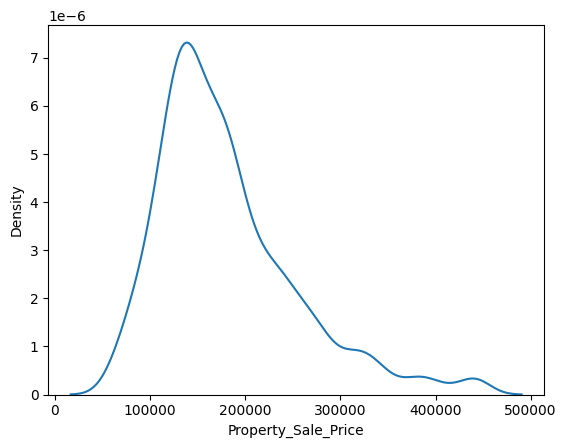

In [192]:
sns.kdeplot(df_dummies['Property_Sale_Price'])
plt.show()

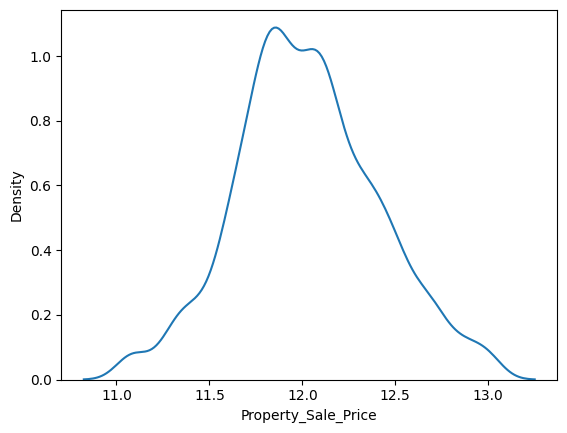

In [193]:
sns.kdeplot(np.log(df_dummies['Property_Sale_Price']))
plt.show()

#### Inference
1) The log(target) is more close towards being a normally dist data.

### Select x and y

In [282]:
# x = independent feature
# y = dependent feature, target variable
x = df_dummies.drop(['Id','Neighborhood','Exterior1st', 'Exterior2nd','YearBuilt',
                     'Property_Sale_Price'],axis=1)
y = np.log(df_dummies['Property_Sale_Price'])
print(x.shape)
print(y.shape)

(2059, 163)
(2059,)


#### Assumption - No/Minimal Multicollinearity (VIF)

VIF
1) It handles multicollinearity.<br>
2) Helps in feature selection.

In [283]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif 

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Feature       VIF
135      GarageQual_No Garage       inf
85       BsmtQual_No Basement       inf
88       BsmtCond_No Basement       inf
140      GarageCond_No Garage       inf
98   BsmtFinType1_No Basement       inf
..                        ...       ...
152            SaleType_ConLI  1.167861
150              SaleType_Con  1.123314
82            Foundation_Wood  1.115562
40              LotConfig_FR3  1.090566
50            Condition1_RRNe  1.076061

[163 rows x 2 columns]

In [285]:
cols_with_high_vif = vif['Feature'][vif['VIF']==np.inf].values
print(cols_with_high_vif)

['GarageQual_No Garage' 'BsmtQual_No Basement' 'BsmtCond_No Basement'
 'GarageCond_No Garage' 'BsmtFinType1_No Basement' 'GarageType_No Garage'
 'GarageFinish_No Garage']


In [286]:
x = x.drop(cols_with_high_vif,axis=1)
print(x.shape)

(2059, 156)


In [287]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

Feature           VIF
27            YrSold  46291.389322
20       GarageYrBlt  30962.766644
5       YearRemodAdd  28149.118211
135    GarageCond_TA   2633.264951
131    GarageQual_TA   2363.034294
..               ...           ...
145   SaleType_ConLI      1.167840
143     SaleType_Con      1.123299
82   Foundation_Wood      1.115401
40     LotConfig_FR3      1.090287
50   Condition1_RRNe      1.075991

[156 rows x 2 columns]

In [288]:
vif.head(20)

Feature           VIF
27                  YrSold  46291.389322
20             GarageYrBlt  30962.766644
5             YearRemodAdd  28149.118211
135          GarageCond_TA   2633.264951
131          GarageQual_TA   2363.034294
12               GrLivArea    891.758675
77            ExterCond_TA    684.334881
10                1stFlrSF    595.921599
30           Zone_Class_RL    166.174358
121      GarageType_Attchd    146.263196
103       BsmtFinType2_Unf    130.221250
63         RoofStyle_Gable    125.730701
11                2ndFlrSF    109.665070
128          GarageQual_Fa     84.521383
75            ExterCond_Gd     83.824991
18            KitchenAbvGr     82.732004
69   MasVnrType_No Masonry     76.816008
132          GarageCond_Fa     67.295739
125      GarageType_Detchd     61.861032
147           SaleType_New     51.855596

In [289]:
cols_with_high_vif2 = vif['Feature'][vif['VIF']>900].values
print(cols_with_high_vif2)

['YrSold' 'GarageYrBlt' 'YearRemodAdd' 'GarageCond_TA' 'GarageQual_TA']


In [290]:
x = x.drop(cols_with_high_vif2,axis=1)
print(x.shape)

(2059, 151)


### OLS-1
1) Helps determine the model parameters (m and c) where the Cost(MSE) is minimum.<br>
2) Helps in feature selection (based on p-value)<br>

In [291]:
import statsmodels.api as sm 

In [292]:
x1 = x.copy()
y1 = y.copy()

In [293]:
x1 = sm.add_constant(x1)      # y= mx + c => c is only generated by using sm.add_constant 
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.909
Model:                             OLS   Adj. R-squared:                  0.902
Method:                  Least Squares   F-statistic:                     126.0
Date:                 Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                         13:00:06   Log-Likelihood:                 1517.7
No. Observations:                 2059   AIC:                            -2731.
Df Residuals:                     1907   BIC:                            -1876.
Df Model:                          151                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.8519      0.122     89.301      0.000      10.614      11.090
Dwell_Type               -6.982e-06   1.74e-05     -0.402      0.688    -4.1e-05    2.71e-05
LotFrontage                  0.0003      0.000      1.593      0.111   -6.43e-05       0.001
LotArea                   1.611e-07    5.7e-07      0.283      0.777   -9.57e-07    1.28e-06
OverallQual                  0.0069      0.002      3.107      0.002       0.003       0.011
OverallCond                  0.0153      0.002      7.021      0.000       0.011       0.020
MasVnrArea                2.812e-05   2.64e-05      1.064      0.287   -2.37e-05       8e-05
BsmtFinSF1                   0.0002   2.03e-05      7.856      0.000       0.000       0.000
BsmtFinSF2                   0.0002   4.06e-05      4.292      0.000    9.46e-05       0.000
BsmtUnfSF                    0.0001   1.79e-05      6.354      0.000    7.87e-05       0.000
1stFlrSF                  4.234e-05    5.3e-05      0.798      0.425   -6.17e-05       0.000
2ndFlrSF                  4.231e-05      5e-05      0.845      0.398   -5.58e-05       0.000
GrLivArea                    0.0002   4.97e-05      4.483      0.000       0.000       0.000
BsmtFullBath                 0.0123      0.008      1.465      0.143      -0.004       0.029
BsmtHalfBath                -0.0005      0.013     -0.042      0.966      -0.026       0.025
FullBath                     0.0164      0.009      1.836      0.066      -0.001       0.034
HalfBath                     0.0274      0.009      3.166      0.002       0.010       0.044
BedroomAbvGr                -0.0029      0.005     -0.554      0.580      -0.013       0.007
KitchenAbvGr                -0.0947      0.022     -4.237      0.000      -0.139      -0.051
Fireplaces                   0.0132      0.011      1.182      0.237      -0.009       0.035
GarageArea                   0.0002   2.22e-05      8.037      0.000       0.000       0.000
WoodDeckSF                6.555e-05   2.59e-05      2.533      0.011    1.48e-05       0.000
OpenPorchSF               8.198e-05   5.26e-05      1.558      0.119   -2.12e-05       0.000
EnclosedPorch                0.0001   5.51e-05      2.108      0.035    8.08e-06       0.000
ScreenPorch                  0.0002   5.78e-05      3.680      0.000    9.94e-05       0.000
MoSold                       0.0014      0.001      1.327      0.185      -0.001       0.003
Zone_Class_FV                0.3725      0.041      9.119      0.000       0.292       0.453
Zone_Class_RH                0.3686      0.046      7.971      0.000       0.278       0.459
Zone_Class_RL                0.3148      0.039      8.132      0.000       0.239       0.391
Zone_Class_RM                0.2422      0.039      6.263      0.000       0.166       0.318
Pro

In [294]:
print('OLS-M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

OLS-M1
0.908898199595498
0.9016845803710198


In [295]:
thresh = 0.7
feat_with_high_p = ols_m1.pvalues[ols_m1.pvalues>thresh].index
print(feat_with_high_p)
print(len(feat_with_high_p))

Index(['LotArea', 'BsmtHalfBath', 'LotConfig_FR3', 'Condition1_RRNe',
       'Dwelling_Type_2fmCon', 'Dwelling_Type_Duplex', 'HouseStyle_1Story',
       'HouseStyle_2Story', 'HouseStyle_SLvl', 'RoofStyle_Shed',
       'ExterQual_Gd', 'BsmtExposure_Mn', 'BsmtFinType2_GLQ',
       'BsmtFinType2_LwQ', 'BsmtFinType2_Unf', 'Electrical_FuseP',
       'Electrical_Mix', 'FireplaceQu_Fa', 'GarageType_CarPort',
       'SaleType_ConLI', 'SaleType_WD'],
      dtype='object')
21


### OLS - M2

In [296]:
print(x.shape)

(2059, 151)


In [297]:
x2 = x.drop(feat_with_high_p,axis=1)
y2 = y.copy()
print(x2.shape)
print(y2.shape)

(2059, 130)
(2059,)


In [298]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.909
Model:                             OLS   Adj. R-squared:                  0.903
Method:                  Least Squares   F-statistic:                     147.9
Date:                 Thu, 08 May 2025   Prob (F-statistic):               0.00
Time:                         13:00:25   Log-Likelihood:                 1517.0
No. Observations:                 2059   AIC:                            -2772.
Df Residuals:                     1928   BIC:                            -2034.
Df Model:                          130                                         
Covariance Type:             nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.8643      0.108    100.236      0.000      10.652      11.077
Dwell_Type               -7.734e-06   1.72e-05     -0.451      0.652   -4.14e-05    2.59e-05
LotFrontage                  0.0003      0.000      1.684      0.092   -4.75e-05       0.001
OverallQual                  0.0069      0.002      3.149      0.002       0.003       0.011
OverallCond                  0.0154      0.002      7.098      0.000       0.011       0.020
MasVnrArea                2.829e-05   2.57e-05      1.099      0.272   -2.22e-05    7.88e-05
BsmtFinSF1                   0.0002   1.93e-05      8.332      0.000       0.000       0.000
BsmtFinSF2                   0.0002   2.91e-05      5.705      0.000       0.000       0.000
BsmtUnfSF                    0.0001   1.71e-05      6.789      0.000    8.27e-05       0.000
1stFlrSF                  4.335e-05   5.12e-05      0.847      0.397   -5.71e-05       0.000
2ndFlrSF                  4.036e-05   4.88e-05      0.827      0.408   -5.53e-05       0.000
GrLivArea                    0.0002   4.81e-05      4.585      0.000       0.000       0.000
BsmtFullBath                 0.0128      0.008      1.651      0.099      -0.002       0.028
FullBath                     0.0171      0.009      1.953      0.051   -7.28e-05       0.034
HalfBath                     0.0281      0.008      3.355      0.001       0.012       0.045
BedroomAbvGr                -0.0031      0.005     -0.614      0.539      -0.013       0.007
KitchenAbvGr                -0.0959      0.015     -6.521      0.000      -0.125      -0.067
Fireplaces                   0.0134      0.011      1.224      0.221      -0.008       0.035
GarageArea                   0.0002   2.13e-05      8.331      0.000       0.000       0.000
WoodDeckSF                6.616e-05   2.54e-05      2.603      0.009    1.63e-05       0.000
OpenPorchSF               8.089e-05   5.19e-05      1.560      0.119   -2.08e-05       0.000
EnclosedPorch                0.0001   5.42e-05      2.108      0.035    7.97e-06       0.000
ScreenPorch                  0.0002   5.71e-05      3.784      0.000       0.000       0.000
MoSold                       0.0013      0.001      1.304      0.192      -0.001       0.003
Zone_Class_FV                0.3717      0.040      9.279      0.000       0.293       0.450
Zone_Class_RH                0.3673      0.046      8.070      0.000       0.278       0.457
Zone_Class_RL                0.3140      0.038      8.264      0.000       0.239       0.388
Zone_Class_RM                0.2412      0.038      6.349      0.000       0.167       0.316
Property_Shape_IR2           0.0467      0.017      2.670      0.008       0.012       0.081
Property_Shape_IR3          -0.0805      0.034     -2.346      0.019      -0.148      -0.013
Pro

In [299]:
print('OLS-M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)
print('OLS-M2')
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

OLS-M1
0.908898199595498
0.9016845803710198
OLS-M2
0.9088364601356356
0.9026895409539097


#### Inference
1) On dropping features with high p_value (p_val>0.7), the Adj R2 increases.<br> 
2) Model shows better goodness of fit after dropping insignificant features.

#### Assumption - No Autocorrelation
A value close to 2 suggests no autocorrelation.<br>
A value closer to 0 suggests positive autocorrelation.<br>
A value closer to 4 suggests negative autocorrelation.<br>

In [300]:
from statsmodels.stats.stattools import durbin_watson

In [301]:
print(durbin_watson(ols_m2.resid))

1.9571436742612676


#### Final set of Independent Feature

In [302]:
x3 = x.drop(feat_with_high_p,axis=1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(2059, 130)
(2059,)


In [303]:
print(x3.columns)

Index(['Dwell_Type', 'LotFrontage', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLD', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'House_Age'],
      dtype='object', length=130)


#### Assumption - Linearity

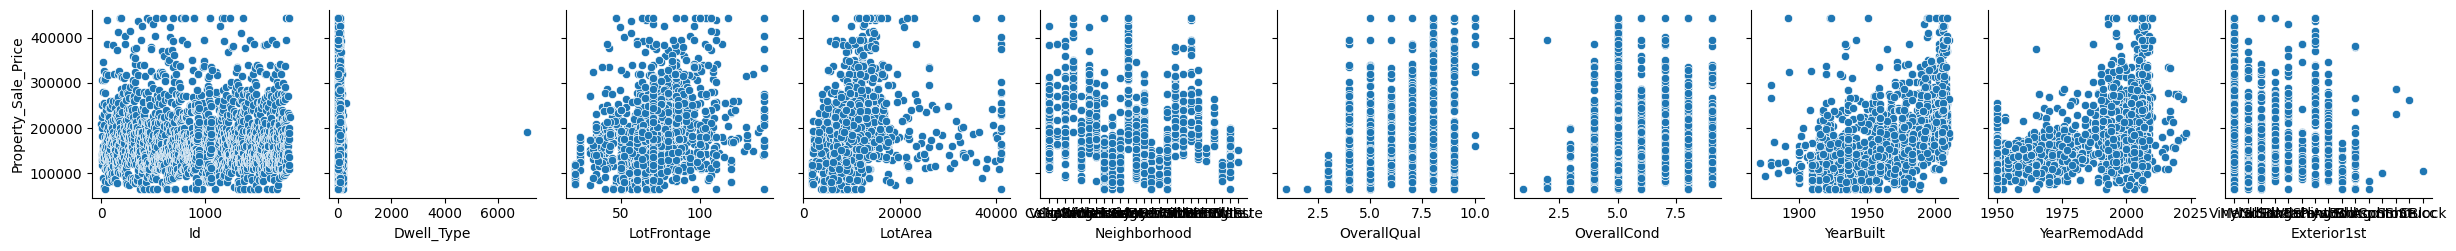

In [304]:
sns.pairplot(data=df_dummies,x_vars=df_dummies.columns[:10],y_vars='Property_Sale_Price')
plt.show()

#### Assumption - Homoscedasticity

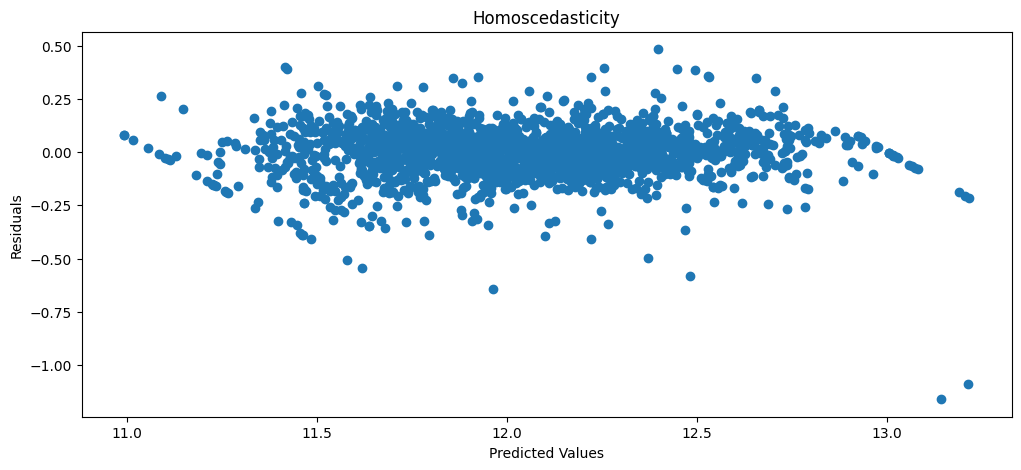

In [305]:
plt.figure(figsize=(12,5))
plt.scatter(ols_m2.predict(),ols_m2.resid)   # Resid = Actual - Predicted Values
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()

#### Split data into train and test

train_test_split splits data randomly by default

In [306]:
from sklearn.model_selection import train_test_split

In [307]:
print(x3.shape)
print(2059*0.3)
print(2059-618)

(2059, 130)
617.6999999999999
1441


In [308]:
x_train,x_test, y_train,y_test = train_test_split(x3,y3,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1441, 130) (618, 130)
(1441,) (618,)


In [309]:
x_train.head()

Dwell_Type  LotFrontage  OverallQual  OverallCond  MasVnrArea  \
311           20         50.0            6            6         0.0   
879           20         70.0            5            8        90.0   
405           20         70.0            4            4         0.0   
1208          20         70.0            5            7         0.0   
1717          60        104.0            8            9         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  ...  \
311        680.0         0.0      292.0     972.0       0.0  ...   
879        646.0         0.0      218.0     864.0       0.0  ...   
405       1116.0         0.0      165.0    1620.0       0.0  ...   
1208       504.0       108.0      319.0    1283.0       0.0  ...   
1717       666.0         0.0      278.0     944.0     896.0  ...   

      SaleType_ConLD  SaleType_ConLw  SaleType_New  SaleType_Oth  \
311                0               0             0             0   
879                0               0             0             0   
405                0               0             0             0   
1208               0               0             0             0   
1717               0               0             0             0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
311                       0                     0                     0   
879                       0                     0                     0   
405                       0                     0                     0   
1208                      0                     0                     0   
1717                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  House_Age  
311                      1                      0         67  
879                      1                      0         37  
405                      1                      0         39  
1208                     1                      0         53  
1717                     1                      0         53  

[5 rows x 130 columns]

#### Linear Regression - sklearn

In [317]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [318]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest,ypred)
    print('MAE',mae,'MSE',mse,'RMSE',rmse)
    print('R2',r2)

### 1) Linear Regression

In [312]:
lr = LinearRegression()     # lr is instance of LinearReg Model
lr.fit(x_train,y_train)     # lr.fit() - trains LinearReg model on x_train, y_train

LinearRegression()

In [313]:
ypred_lr = lr.predict(x_test)
print(len(ypred_lr))

618


In [319]:
eval_model(y_test,ypred_lr)

MAE 0.09086823129489605 MSE 0.017749722265376692 RMSE 0.13322808362119712
R2 0.8853910878451761


### Model Coefficients

In [324]:
m = lr.coef_
c = lr.intercept_
print(len(m),x_train.shape)
print("Coef",m)
print('Intercept',c)

130 (1441, 130)
Coef [-1.00848326e-05  3.85800405e-05  5.34469046e-03  1.69903227e-02
  3.21713541e-05  1.43508689e-04  1.61691985e-04  1.01256785e-04
  4.02996407e-05  2.97871662e-05  2.37928122e-04  1.64331489e-02
  1.30101697e-02  2.33342885e-02 -4.32147043e-03 -8.79657235e-02
  2.60042280e-02  1.67730807e-04  5.19786740e-05  1.43444825e-04
  1.85465186e-04  1.96488399e-04  1.04861503e-03  3.38293295e-01
  3.78745066e-01  2.90339051e-01  2.09091379e-01  4.63682355e-02
  3.91263205e-02 -1.05773038e-02  7.37487669e-02  5.81266749e-02
  3.75495890e-02  1.76212639e-02 -3.00125420e-02 -1.51420711e-02
  1.13836270e-02  2.27403818e-02  2.36311918e-02  7.61168855e-02
  5.73705013e-02 -1.62263286e-02  3.88884743e-02  5.43209077e-02
  1.14594798e-01 -8.17965770e-02 -5.82369049e-02  3.79663041e-02
 -7.41641735e-02  2.83446528e-02 -5.36348126e-02  2.43832183e-02
  1.28154721e-01  3.33620944e-02  1.11232549e-02  7.21376198e-02
  6.69293468e-02  9.14198420e-02 -8.22180057e-02 -4.20026862e-02
 -7.

### Train and Test Score

In [315]:
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))

Train Score 0.9136168917283597
Test Score 0.8853910878451761


#### Overfitting
1) Model with high variance and low bias suffers from overfitting.<br>
2) As a consequence, train score is higher compared to test score.<br>

#### Underfitting
1) Model with low variance and high bias suffers from underfitting.<br>
2) As a consequence, test score is higher compared to train score.<br>

#### Inference
Model is slightly overfit

#### Regularization

1) Regularization it a methodlogy used to treat overfitting.<br>
2) Bias and varaince are inversely proportional.<br>
3) In Regularization, bias is added to minimize the impact of high varaince.<br>
4) There are 3 types of Regularization<pre>
a) Ridge
b) Lasso
c) Elasticnet


### Ridge (L2 Regularization)
1) In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.<br>
2) Ridge regression shrinks the coefficients and it helps to reduce the model complexity.<br>
3) So ridge regression puts constraint on the coefficients (m). The penalty term (alpha) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized<br>
4) When alpha → 0 , the cost function becomes similar to the linear regression cost function. So lower the constraint (low alpha) on the features, the model will resemble linear regression model.

ypred = mx + c

Linear Regression(Cost Function) = MSE = (1/n)* sum((yi-ypredi)^2)

Ridge(Cost Function) = (1/n)* sum((yi-ypredi)^2) + alpha* sum((m)^2))

alpha = regualrization coefficient



### Lasso(L1 Regularization)

1) Least absolute shrinkage and selection operator.<br>
2) Just like Ridge regression cost function, for alpha =0, the equation above reduces to the equation of linear regresion<br>
3) The only difference is instead of taking the square of the coefficients, magnitudes are taken into account.<br>
4) This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.<br>


Lasso(Cost Function) =  (1/n)* sum((yi-ypredi)^2) + alpha* sum(|m|))



In [325]:
# ypred = m1x1 + m2x2+  m3x3 + m4x4 + m5x5 + m6x6 + c

# m3,m5 = 0

### Ridge Reg

In [331]:
rid1 = Ridge(alpha = 1.3435)
rid1.fit(x_train,y_train)

Ridge(alpha=1.3435)

In [333]:
print('Linear Score')
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))
print('Ridge Score')
print('Train Score',rid1.score(x_train,y_train))
print('Test Score',rid1.score(x_test,y_test))

Linear Score
Train Score 0.9136168917283597
Test Score 0.8853910878451761
Ridge Score
Train Score 0.9124654257446577
Test Score 0.8856912684485875


#### Inference
1) Ridge minimizes the overfitting

#### Lasso Reg

In [335]:
las1 = Lasso(alpha = 1.7)
las1.fit(x_train,y_train)

Lasso(alpha=1.7)

In [336]:
print('Linear Score')
print('Train Score',lr.score(x_train,y_train))
print('Test Score',lr.score(x_test,y_test))
print('Lasso Score')
print('Train Score',las1.score(x_train,y_train))
print('Test Score',las1.score(x_test,y_test))

Linear Score
Train Score 0.9136168917283597
Test Score 0.8853910878451761
Lasso Score
Train Score 0.762384905022042
Test Score 0.7707018994649996


In [337]:
print(las1.coef_)

[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  5.63395628e-05  3.31015243e-04  1.43955537e-04  2.37117225e-04
  0.00000000e+00  2.58323107e-05  3.35227116e-04  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  4.23558574e-04  1.54513676e-04  6.72881388e-05
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000